# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [183]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
sns.set_context('poster')
sns.set_style("whitegrid")

In [184]:
sns.__version__

'0.9.0'

In [185]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'
win = 1

# load data
net_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/network_stats.csv', index_col=0)
node_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/node_stats.csv', index_col=0)

Check the data

In [186]:
net_data.head(10)

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
1         alpha_aec   107     -0.518788     -0.212765         -0.728762   
2         alpha_coh   107     -0.022073     -0.096676         -0.727858   
3         alpha_plv   107     -1.075850     -0.362232         -0.978409   
4          beta_aec   107     -0.401826     -0.006060         -0.408405   
5          beta_coh   107      0.630719      0.267004          0.020591   
6          beta_plv   107     -0.144142      0.022901          0.025766   
7      broadband_ar   107     -0.045776      0.015196          0.128521   
8   broadband_xcorr   107      0.252317      0.049757         -0.114290   
9         gamma_aec   107      0.020394      0.064586          0.302707   
10        gamma_coh   107      0.362576      0.067619         -0.418193   

    str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
1          -0.262822             -0.196481           -0.121166   
2          -0.291215             -0.046865            0.031021   
3          -0.226913             -0.360287           -0.102201   
4          -0.022788             -0.004087            0.032011   
5           0.063867              0.302642            0.691316   
6           0.006348              0.020277            0.144279   
7          -0.194995              0.064500            0.270712   
8           0.023740              0.040236            0.089493   
9           0.143409              0.025347            0.167621   
10         -0.139561              0.268100            0.282175   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -0.434757           -0.200296               -0.562997   
2               0.165573            0.400685               -0.135117   
3              -1.013099           -0.610705               -1.004727   
4              -0.368800           -0.456325               -0.378797   
5               0.755425            1.681941                0.391789   
6              -0.208087            0.130985               -0.205304   
7              -0.052428            1.276410               -0.469195   
8               0.286573            0.364934                0.225691   
9              -0.135068            0.367724                0.019741   
10              0.984236            1.147949                0.320573   

   fc_measure  str_not_spike_beta_num       band    subj hand   age gender  \
1         aec               -0.221906      alpha  R1170J    R  20.0      M   
2         coh               -0.108587      alpha  R1170J    R  20.0      M   
3         plv               -0.378473      alpha  R1170J    R  20.0      M   
4         aec               -0.018340       beta  R1170J    R  20.0      M   
5         coh                0.179664       beta  R1170J    R  20.0      M   
6         plv               -0.033981       beta  R1170J    R  20.0      M   
7          ar               -0.088351  broadband  R1170J    R  20.0      M   
8       xcorr                0.051291  broadband  R1170J    R  20.0      M   
9         aec                0.062734      gamma  R1170J    R  20.0      M   
10        coh                0.058619      gamma  R1170J    R  20.0      M   

    race  
1    2.0  
2    2.0  
3    2.0  
4    2.0  
5    2.0  
6    2.0  
7    2.0  
8    2.0  
9    2.0  
10   2.0

In [187]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 1 to 3648
Data columns (total 19 columns):
band_measure              3648 non-null object
n_tp                      3648 non-null int64
str_beta_bin              3600 non-null float64
str_beta_num              3600 non-null float64
str_soz_beta_bin          2624 non-null float64
str_soz_beta_num          2624 non-null float64
str_not_soz_beta_num      2612 non-null float64
str_spike_beta_num        2480 non-null float64
str_not_soz_beta_bin      2612 non-null float64
str_spike_beta_bin        2480 non-null float64
str_not_spike_beta_bin    2468 non-null float64
fc_measure                3648 non-null object
str_not_spike_beta_num    2468 non-null float64
band                      3648 non-null object
subj                      3648 non-null object
hand                      3568 non-null object
age                       3600 non-null float64
gender                    3632 non-null object
race                      3504 non-nu

In [188]:
net_data.describe()

n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
count  3648.000000   3600.000000   3600.000000       2624.000000   
mean   1129.631579     -0.181931      0.084289         -0.157330   
std    1378.240218      1.254355      0.390832          1.169309   
min      15.000000    -15.194886     -7.030166        -13.589867   
25%     214.750000     -0.541593     -0.062128         -0.524218   
50%     631.500000     -0.135734      0.042214         -0.134528   
75%    1305.000000      0.165778      0.217146          0.177090   
max    7643.000000     22.368412      4.797653         13.284764   

       str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
count       2624.000000           2612.000000         2480.000000   
mean           0.082783              0.067588            0.089757   
std            0.352341              0.347194            0.358226   
min           -3.169730             -2.828032           -3.392342   
25%           -0.055980             -0.071273           -0.053358   
50%            0.048277              0.034390            0.057928   
75%            0.213481              0.195349            0.224963   
max            3.798520              3.272137            3.336776   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count           2612.000000         2480.000000             2468.000000   
mean              -0.147718           -0.156750               -0.137416   
std                1.151914            1.209011                1.209056   
min              -11.074260          -10.972012              -10.822055   
25%               -0.493653           -0.570975               -0.506271   
50%               -0.120204           -0.138415               -0.107268   
75%                0.170020            0.205828                0.203037   
max                8.880437           12.543848               12.952465   

       str_not_spike_beta_num          age         race  
count             2468.000000  3600.000000  3504.000000  
mean                 0.061180    35.457778     2.899543  
std                  0.364713    11.869036     1.189525  
min                 -3.468858     0.000000     1.000000  
25%                 -0.078262    26.000000     2.000000  
50%                  0.032719    34.000000     4.000000  
75%                  0.187670    44.000000     4.000000  
max                  3.214858    66.000000     4.000000

In [189]:
node_data.head(10)

elec     band_measure  n_tp  elec_spike  elec_in_soz  str_soz_beta_bin  \
1   L1AG1        alpha_aec   107         0.0            0         -0.064734   
2   L1AG1        alpha_coh   107         0.0            0          0.541214   
3   L1AG1        alpha_plv   107         0.0            0          0.431290   
4   L1AG1         beta_aec   107         0.0            0         -0.098122   
5   L1AG1         beta_coh   107         0.0            0          0.141858   
6   L1AG1         beta_plv   107         0.0            0          0.204790   
7   L1AG1     broadband_ar   107         0.0            0          0.162241   
8   L1AG1  broadband_xcorr   107         0.0            0          0.396073   
9   L1AG1        gamma_aec   107         0.0            0          0.335877   
10  L1AG1        gamma_coh   107         0.0            0          0.014761   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1               0.796489            0.613113                0.638948   
2              -0.358226            0.467496               -0.372192   
3               0.243608            0.191537                0.330821   
4               0.012391           -0.675751                0.080250   
5              -0.530916            0.871678               -0.631875   
6              -0.105088            0.741656               -0.127487   
7               0.147601            1.490857               -0.292736   
8               0.980525            0.478364                0.929362   
9               0.306607           -0.001227                0.404701   
10              0.443250            0.244977                0.320027   

    str_beta_bin  ...        band            region       x        y  \
1       0.701313  ...       alpha  inferiorparietal -40.988 -50.1327   
2      -0.316276  ...       alpha  inferiorparietal -40.988 -50.1327   
3       0.329259  ...       alpha  inferiorparietal -40.988 -50.1327   
4      -0.047891  ...        beta  inferiorparietal -40.988 -50.1327   
5      -0.440917  ...        beta  inferiorparietal -40.988 -50.1327   
6      -0.046148  ...        beta  inferiorparietal -40.988 -50.1327   
7       0.267050  ...   broadband  inferiorparietal -40.988 -50.1327   
8       0.949372  ...   broadband  inferiorparietal -40.988 -50.1327   
9       0.367511  ...       gamma  inferiorparietal -40.988 -50.1327   
10      0.360856  ...       gamma  inferiorparietal -40.988 -50.1327   

            z    subj hand   age  gender  race  
1   17.177778  R1170J    R  20.0       M   2.0  
2   17.177778  R1170J    R  20.0       M   2.0  
3   17.177778  R1170J    R  20.0       M   2.0  
4   17.177778  R1170J    R  20.0       M   2.0  
5   17.177778  R1170J    R  20.0       M   2.0  
6   17.177778  R1170J    R  20.0       M   2.0  
7   17.177778  R1170J    R  20.0       M   2.0  
8   17.177778  R1170J    R  20.0       M   2.0  
9   17.177778  R1170J    R  20.0       M   2.0  
10  17.177778  R1170J    R  20.0       M   2.0  

[10 rows x 26 columns]

In [190]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368896 entries, 1 to 368896
Data columns (total 26 columns):
elec                      368896 non-null object
band_measure              368896 non-null object
n_tp                      368896 non-null int64
elec_spike                368896 non-null float64
elec_in_soz               368896 non-null int64
str_soz_beta_bin          259152 non-null float64
str_not_soz_beta_bin      239414 non-null float64
str_spike_beta_bin        241776 non-null float64
str_not_spike_beta_bin    214626 non-null float64
str_beta_bin              360256 non-null float64
str_soz_beta_num          259152 non-null float64
str_not_soz_beta_num      239414 non-null float64
str_spike_beta_num        241776 non-null float64
str_beta_num              360256 non-null float64
str_not_spike_beta_num    214626 non-null float64
fc_measure                368896 non-null object
band                      368896 non-null object
region                    336544 non-null objec

In [191]:
node_data.describe()

n_tp     elec_spike    elec_in_soz  str_soz_beta_bin  \
count  368896.000000  368896.000000  368896.000000     259152.000000   
mean     1037.806298       0.020451       0.058336         -0.069473   
std      1313.221065       0.044213       0.234378          1.202268   
min        11.000000       0.000000       0.000000        -29.042425   
25%       165.000000       0.000000       0.000000         -0.349631   
50%       570.000000       0.003322       0.000000         -0.052314   
75%      1198.000000       0.018692       0.000000          0.203676   
max      7643.000000       0.600000       1.000000         30.553535   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count         239414.000000       241776.000000           214626.000000   
mean              -0.096937           -0.076518               -0.098735   
std                1.213375            1.217761                1.211313   
min              -34.430428          -31.979384              -26.708288   
25%               -0.404035           -0.396701               -0.415829   
50%               -0.072078           -0.060664               -0.076538   
75%                0.188146            0.221989                0.204913   
max               27.666095           28.979234               28.388302   

        str_beta_bin  str_soz_beta_num  str_not_soz_beta_num  \
count  360256.000000     259152.000000         239414.000000   
mean       -0.116640          0.049233              0.067037   
std         1.322453          0.357143              0.370438   
min       -36.883531         -8.286508             -7.864474   
25%        -0.434567         -0.055396             -0.049554   
50%        -0.076518          0.028716              0.036202   
75%         0.200220          0.144941              0.169037   
max        30.017346          9.176234              9.147868   

       str_spike_beta_num   str_beta_num  str_not_spike_beta_num  \
count       241776.000000  360256.000000           214626.000000   
mean             0.056760       0.078568                0.066422   
std              0.372535       0.407001                0.375409   
min             -7.474270      -8.115780               -7.721516   
25%             -0.056172      -0.049112               -0.054453   
50%              0.033468       0.041860                0.035615   
75%              0.160707       0.187137                0.170526   
max              8.984809      10.385316                9.115380   

                   x              y              z            age  \
count  299552.000000  299552.000000  299552.000000  358688.000000   
mean       -7.029387      -6.972573       4.831993      35.574538   
std        45.739288      35.362475      43.691825      12.077454   
min      -165.993000    -143.909000    -402.070855       0.000000   
25%       -45.094900     -30.047400     -19.298305      26.000000   
50%       -16.776900      -7.834615       1.459700      34.000000   
75%        33.515900      15.407000      32.621168      44.000000   
max       173.816000     207.770000      93.980799      66.000000   

                race  
count  356704.000000  
mean        2.890150  
std         1.186443  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         4.000000  
max         4.000000

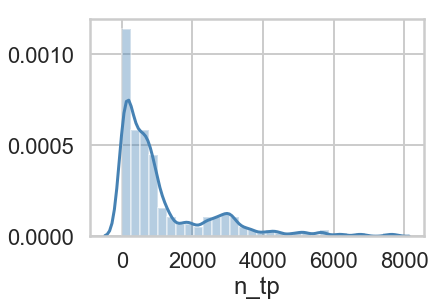

In [192]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [193]:
net_data.subj.nunique()

189

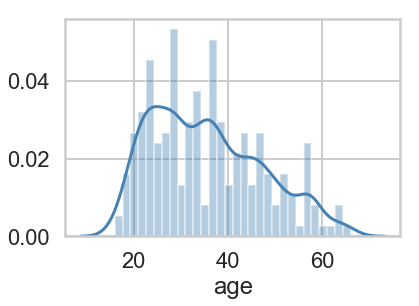

In [197]:
net_data['age'].replace(to_replace=0, value=None, inplace=True)
sns.distplot(net_data['age'].dropna(), bins=30, color='steelblue')
mean_age = net_data['age'].mean()

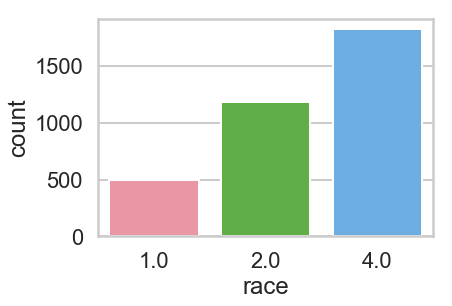

In [198]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

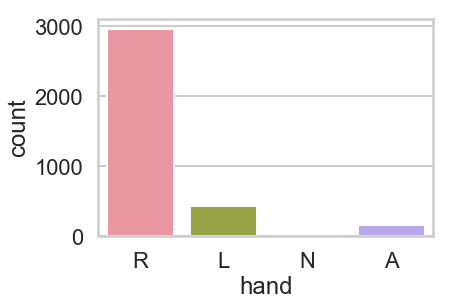

In [199]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

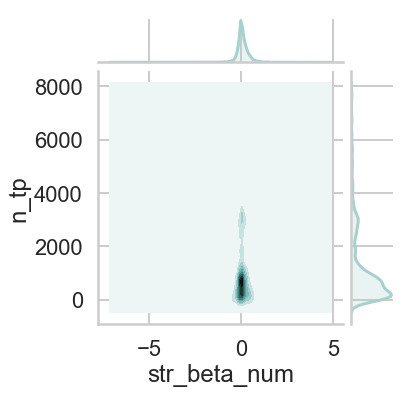

In [200]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

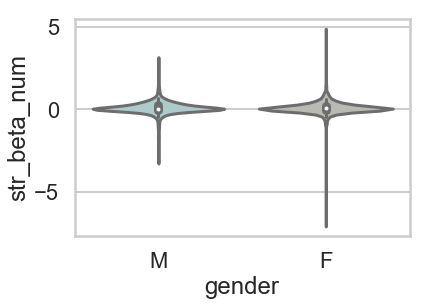

In [201]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [202]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [203]:
net_data.dropna().subj.nunique()


118

In [204]:
net_data.dropna(inplace=True)
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368896 entries, 1 to 368896
Data columns (total 26 columns):
elec                      368896 non-null object
band_measure              368896 non-null object
n_tp                      368896 non-null int64
elec_spike                368896 non-null float64
elec_in_soz               368896 non-null int64
str_soz_beta_bin          259152 non-null float64
str_not_soz_beta_bin      239414 non-null float64
str_spike_beta_bin        241776 non-null float64
str_not_spike_beta_bin    214626 non-null float64
str_beta_bin              360256 non-null float64
str_soz_beta_num          259152 non-null float64
str_not_soz_beta_num      239414 non-null float64
str_spike_beta_num        241776 non-null float64
str_beta_num              360256 non-null float64
str_not_spike_beta_num    214626 non-null float64
fc_measure                368896 non-null object
band                      368896 non-null object
region                    336544 non-null objec

In [615]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165884 entries, 11095 to 365912
Data columns (total 26 columns):
elec                      165884 non-null object
band_measure              165884 non-null object
n_tp                      165884 non-null int64
elec_spike                165884 non-null float64
elec_in_soz               165884 non-null int64
str_soz_beta_bin          165884 non-null float64
str_not_soz_beta_bin      165884 non-null float64
str_spike_beta_bin        165884 non-null float64
str_not_spike_beta_bin    165884 non-null float64
str_beta_bin              165884 non-null float64
str_soz_beta_num          165884 non-null float64
str_not_soz_beta_num      165884 non-null float64
str_spike_beta_num        165884 non-null float64
str_beta_num              165884 non-null float64
str_not_spike_beta_num    165884 non-null float64
fc_measure                165884 non-null object
band                      165884 non-null object
region                    165884 non-null o

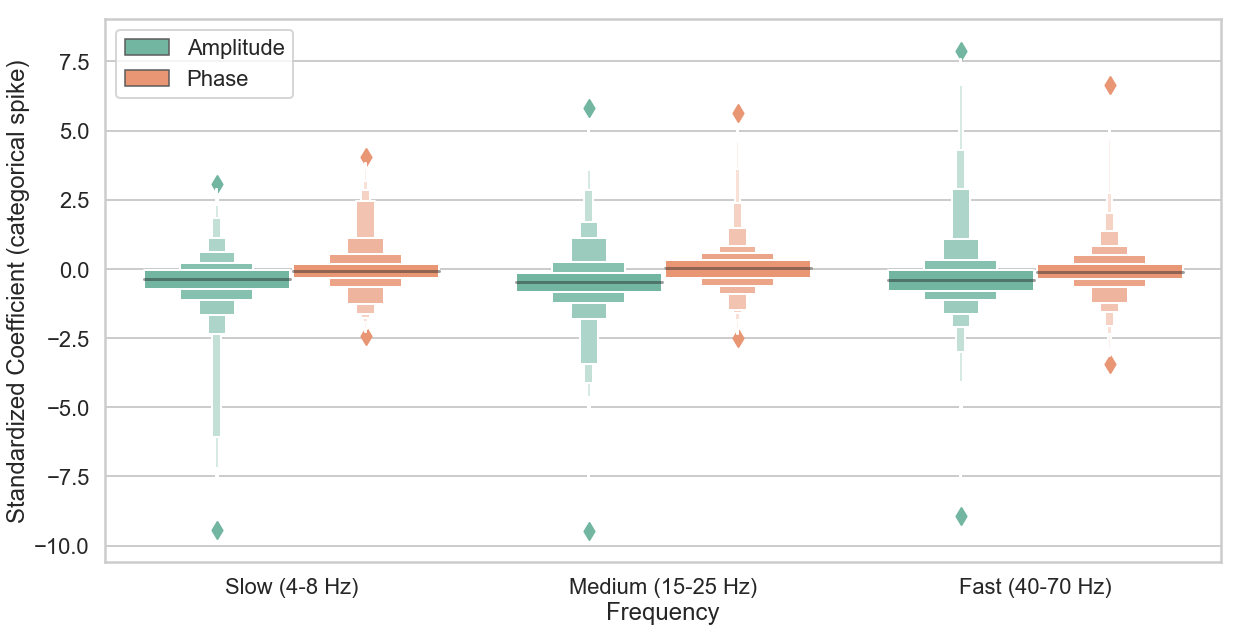

In [207]:
tmp = net_data.groupby(['subj', 'band_measure']).first().reset_index()
tmp = tmp[tmp['fc_measure'].isin(['aec','plv'])]
tmp = tmp[tmp['band'].isin(['theta','beta','gamma'])]

tmp.band = tmp.band.map({'theta':'Slow (4-8 Hz)', 'beta':'Medium (15-25 Hz)', 'gamma':'Fast (40-70 Hz)'})
tmp.fc_measure = tmp.fc_measure.map({'aec':'Amplitude', 'plv':'Phase'})
tmp.rename(columns={'band':'Frequency','str_beta_bin':'Standardized Coefficient (categorical spike)',
                   'str_beta_num':'Standardized Coefficient (number of spikes)'}, inplace=True)

custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=tmp, x="Frequency", y='Standardized Coefficient (categorical spike)', hue='fc_measure', 
            order=['Slow (4-8 Hz)','Medium (15-25 Hz)','Fast (40-70 Hz)'])
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend()
plt.savefig("../img/wids_bin_str.eps")

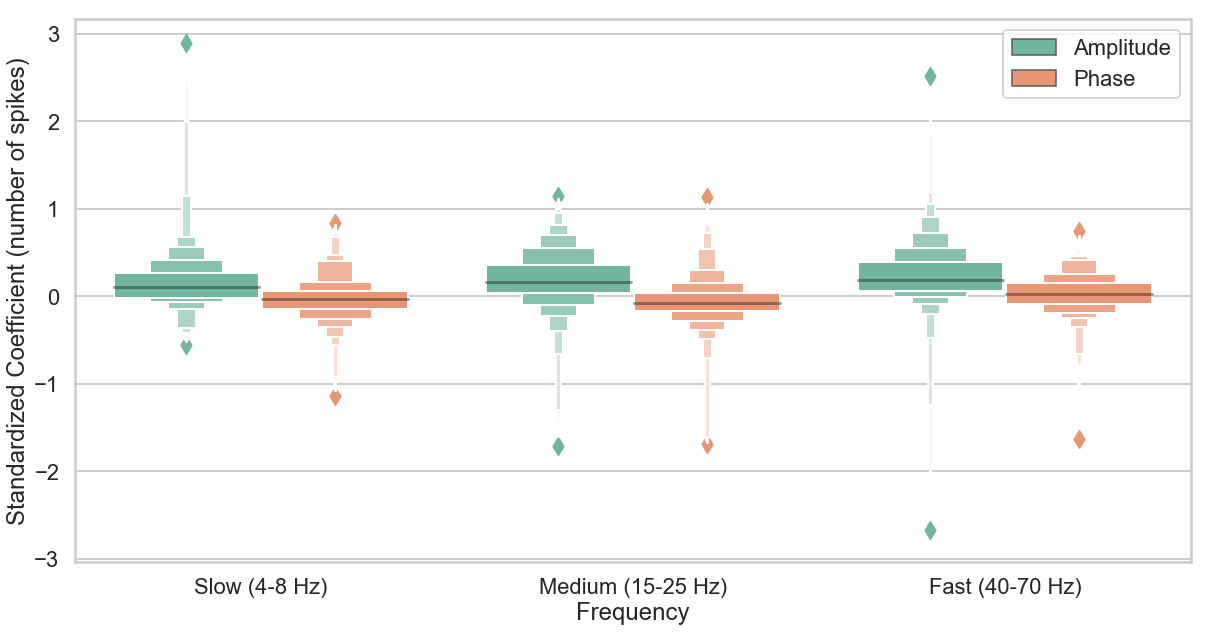

In [208]:
custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=tmp, x="Frequency", y='Standardized Coefficient (number of spikes)', hue='fc_measure', 
            order=['Slow (4-8 Hz)','Medium (15-25 Hz)','Fast (40-70 Hz)'])
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend()
plt.savefig("../img/wids_bin_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


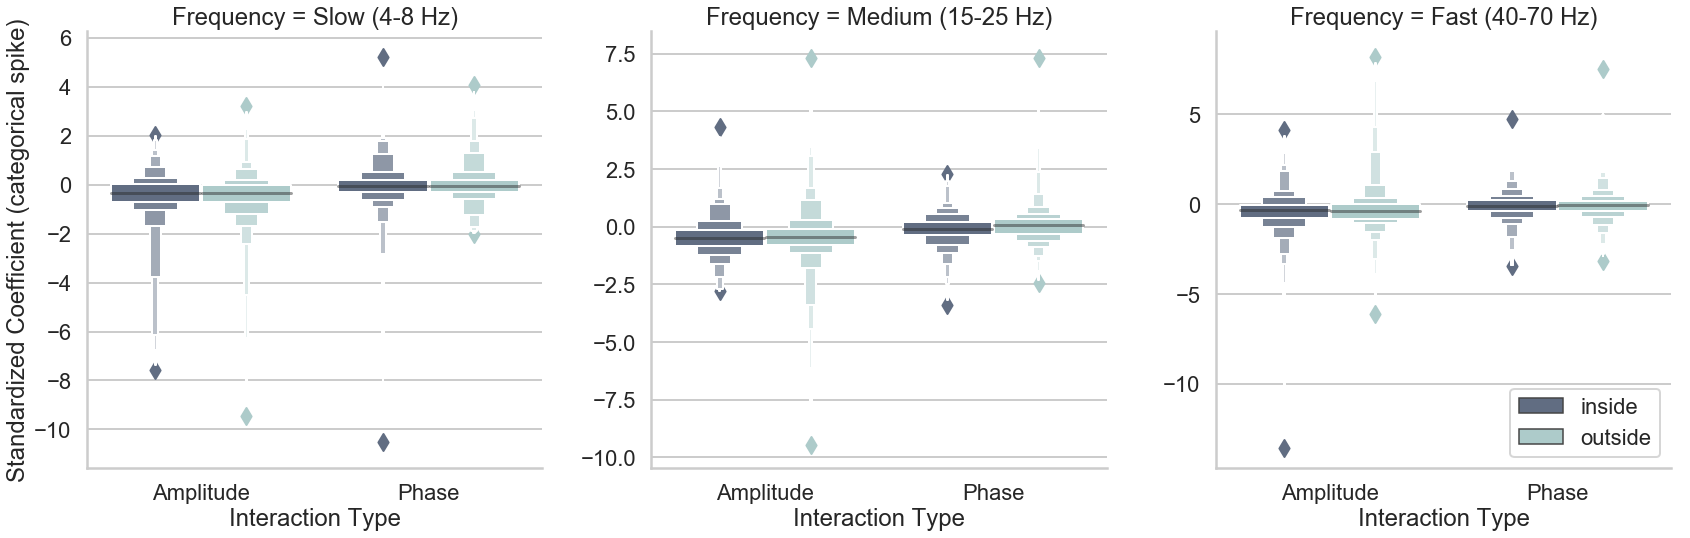

In [209]:
tmp_soz_bin = pd.melt(tmp, id_vars =['Frequency', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                             var_name ='SOZ', value_name ='soz_beta_bin')  
tmp_soz_bin.SOZ = tmp_soz_bin.SOZ.map({'str_soz_beta_bin':'inside', 'str_not_soz_beta_bin':'outside'})
tmp_soz_bin.rename(columns={'soz_beta_bin':'Standardized Coefficient (categorical spike)', 'fc_measure':'Interaction Type'}, inplace=True)
#color pallette
colors = ['#5b6c88', '#a8d0cf']
#custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=tmp_soz_bin, col='Frequency' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8, col_order=['Slow (4-8 Hz)','Medium (15-25 Hz)','Fast (40-70 Hz)'])
g.map(sns.boxenplot, 'Interaction Type', 'Standardized Coefficient (categorical spike)', 'SOZ', palette = colors, hue_order=['inside','outside'])
plt.legend()
    
g.savefig("../img/tmp_soz_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


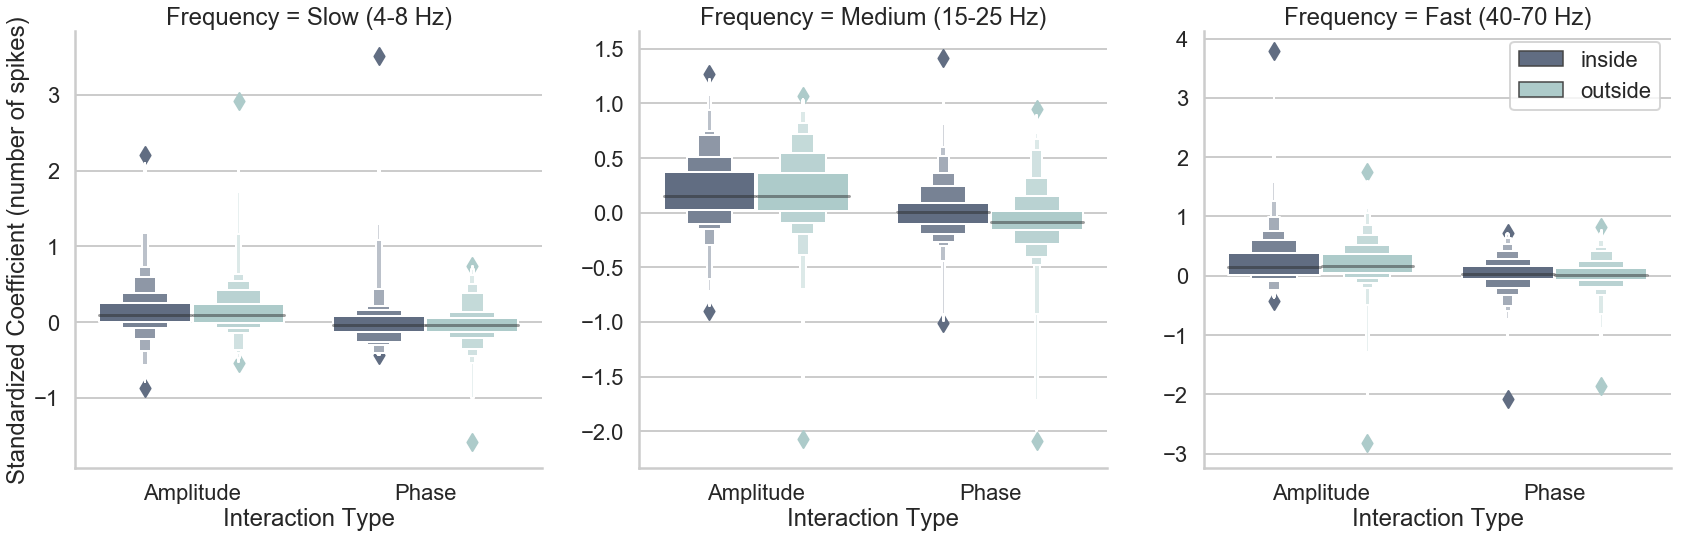

In [210]:
tmp_soz_num = pd.melt(tmp, id_vars =['Frequency', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  
                             var_name ='SOZ', value_name ='soz_beta_num')  
tmp_soz_num.SOZ = tmp_soz_num.SOZ.map({'str_soz_beta_num':'inside', 'str_not_soz_beta_num':'outside'})
tmp_soz_num.rename(columns={'soz_beta_num':'Standardized Coefficient (number of spikes)', 'fc_measure':'Interaction Type'}, inplace=True)
    
g = sns.FacetGrid(data=tmp_soz_num, col='Frequency' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8, col_order=['Slow (4-8 Hz)','Medium (15-25 Hz)','Fast (40-70 Hz)'])
g.map(sns.boxenplot, 'Interaction Type', 'Standardized Coefficient (number of spikes)', 'SOZ', palette = colors, hue_order=['inside','outside'])
plt.legend()
    
g.savefig("../img/tmp_soz_num.eps")

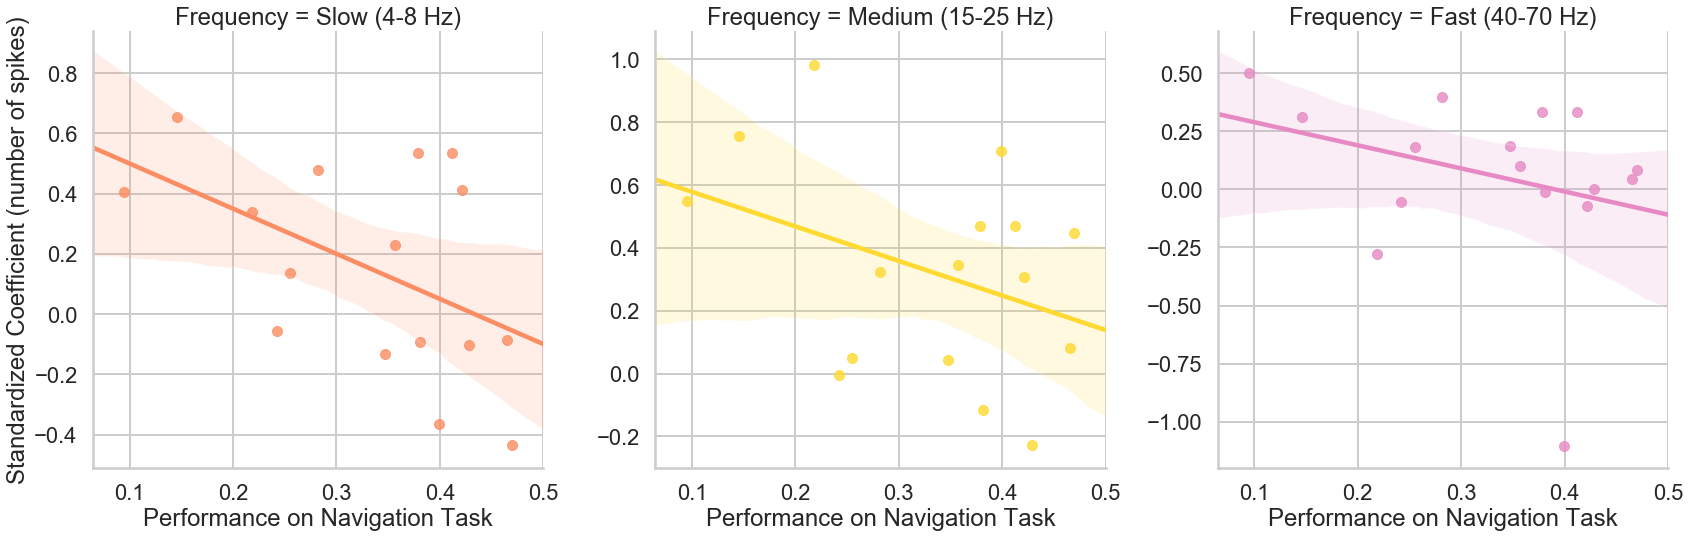

In [215]:
# merge with net_data
subj_idx = [x in tmp.subj.unique() for x in task_data.subj]
task_data = task_data[subj_idx]
tmp_task_data = pd.merge(tmp, task_data, on=['subj'])

# log tranform
tmp_task_data.PAL = np.log(tmp_task_data.PAL)
tmp_task_data.rename(columns={'TH':'Performance on Navigation Task'}, inplace=True)

sns.lmplot(data=tmp_task_data[tmp_task_data['fc_measure'] == 'Amplitude'], x='Performance on Navigation Task', y='Standardized Coefficient (number of spikes)', hue='Frequency', col="Frequency", 
           col_wrap=3, height=8, sharex=False, sharey=False, palette='Set2_r', scatter_kws={'s':100, 'alpha':.8}, col_order=['Slow (4-8 Hz)','Medium (15-25 Hz)','Fast (40-70 Hz)'])
plt.savefig("../img/tmp_perf_band_aec.pdf")

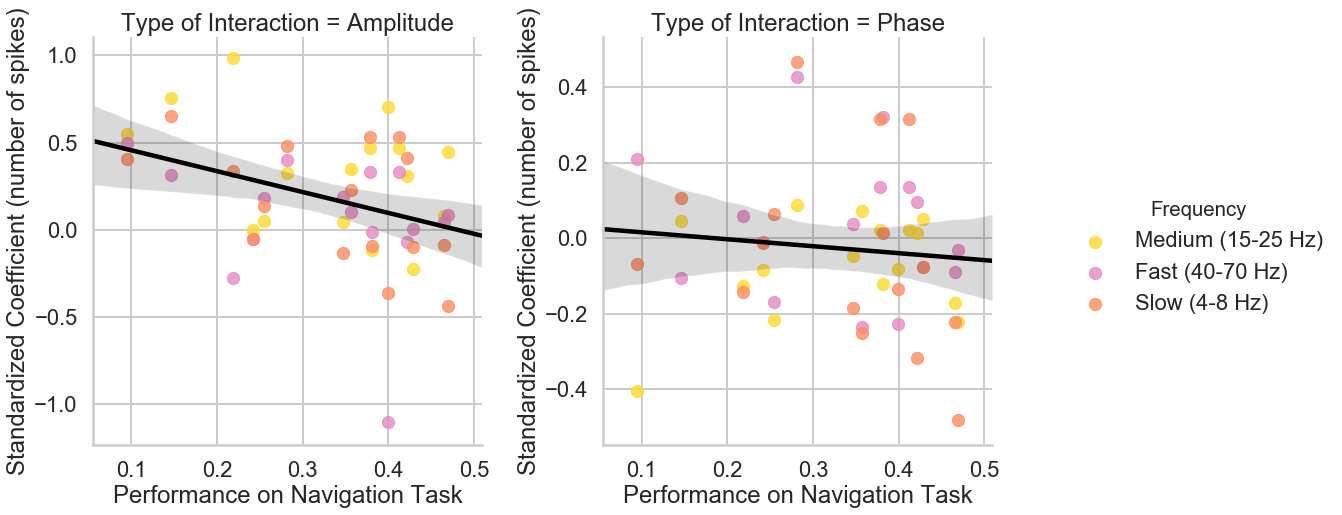

In [216]:
# g = sns.FacetGrid(data=tmp_task_data, col='fc_measure' ,col_wrap = 3, 
#                   sharex=False, sharey=False, legend_out=True, height=8)

tmp_task_data.rename(columns={'fc_measure':'Type of Interaction'}, inplace=True)
measures = tmp_task_data['Type of Interaction'].unique()
g = sns.lmplot(data=tmp_task_data, x='Performance on Navigation Task', y='Standardized Coefficient (number of spikes)', hue='Frequency', fit_reg=False, col = 'Type of Interaction',
           height=6, sharex=False, sharey=False, palette='Set2_r', scatter_kws={'s':150, 'alpha':.8})
for i in range(2):
     sns.regplot(data=tmp_task_data[tmp_task_data['Type of Interaction'] == measures[i]], x='Performance on Navigation Task', y='Standardized Coefficient (number of spikes)', scatter=False,  ax=g.axes[0,i], color='black')


g.fig.set_figwidth(20)
g.fig.set_figheight(10)

plt.savefig("../img/tmp_perf_band.pdf")

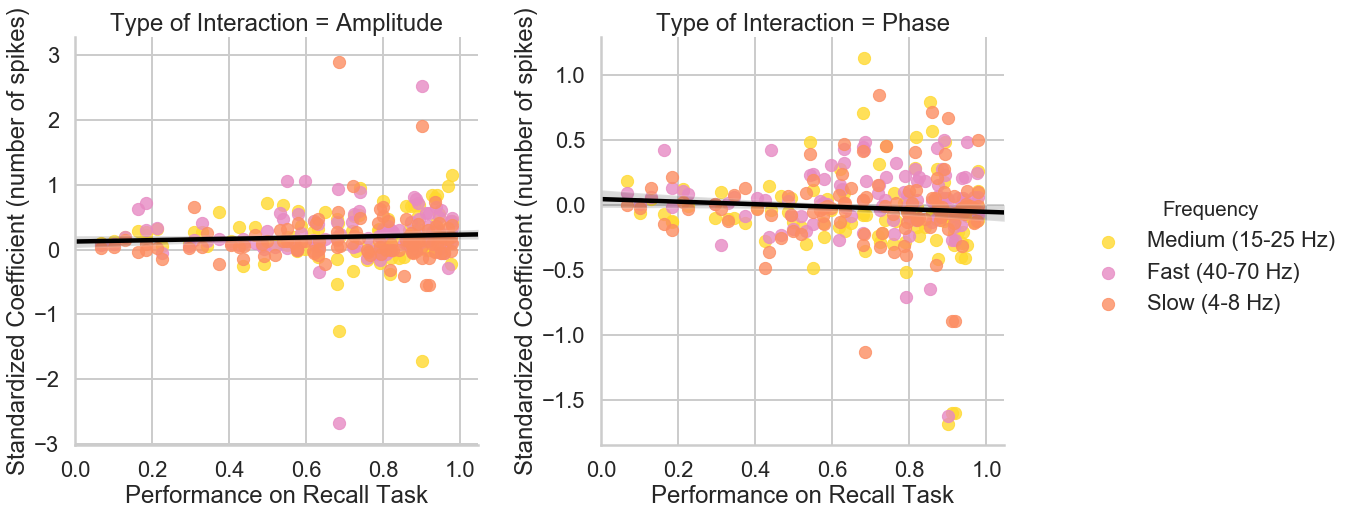

In [217]:
tmp_task_data.rename(columns={'recall':'Performance on Recall Task'}, inplace=True)
g = sns.lmplot(data=tmp_task_data, x='Performance on Recall Task', y='Standardized Coefficient (number of spikes)', hue='Frequency', fit_reg=False, col = 'Type of Interaction',
           height=6, sharex=False, sharey=False, palette='Set2_r', scatter_kws={'s':150, 'alpha':.8})
for i in range(2):
     sns.regplot(data=tmp_task_data[tmp_task_data['Type of Interaction'] == measures[i]], x='Performance on Recall Task', y='Standardized Coefficient (number of spikes)', scatter=False,  ax=g.axes[0,i], color='black')


g.fig.set_figwidth(20)
g.fig.set_figheight(10)

plt.savefig("../img/tmp_perf_band.pdf")

## Effects on Network Measures

test if intereictal spike regularly change network strength.

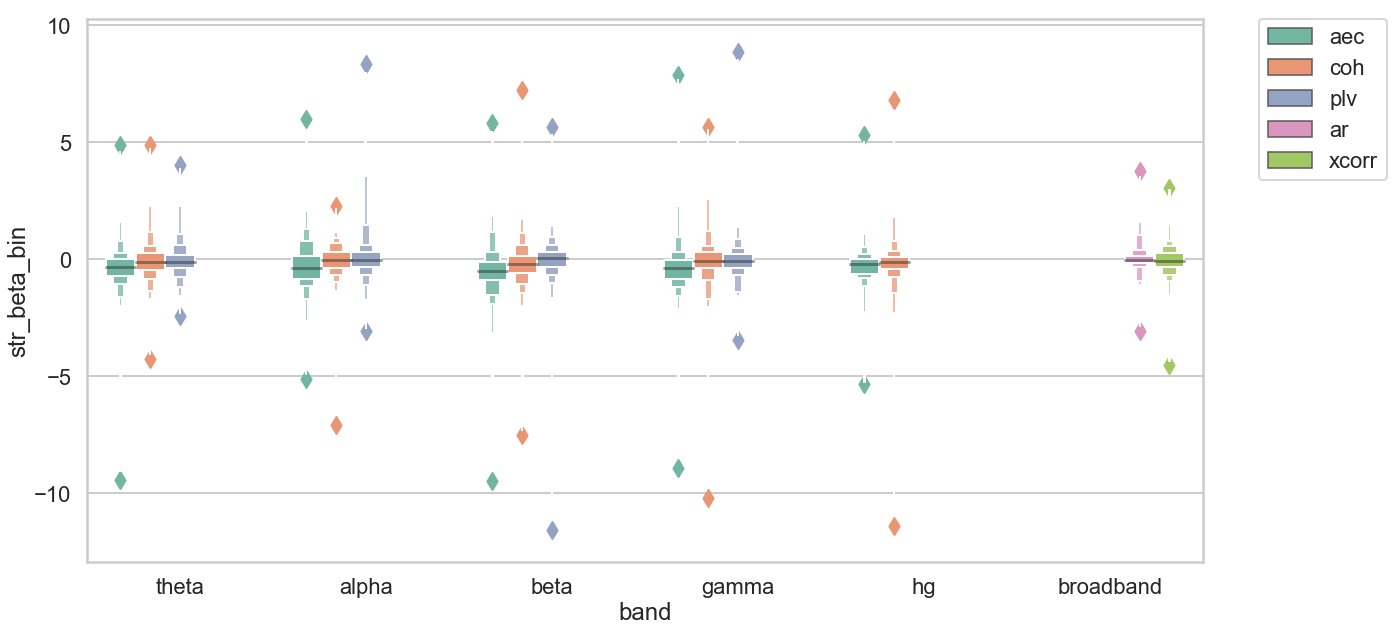

In [218]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_bin', hue='fc_measure', 
            order=['theta','alpha','beta','gamma','hg','broadband'])
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-5,5)
#plt.savefig("../img/net_bin_str.eps")


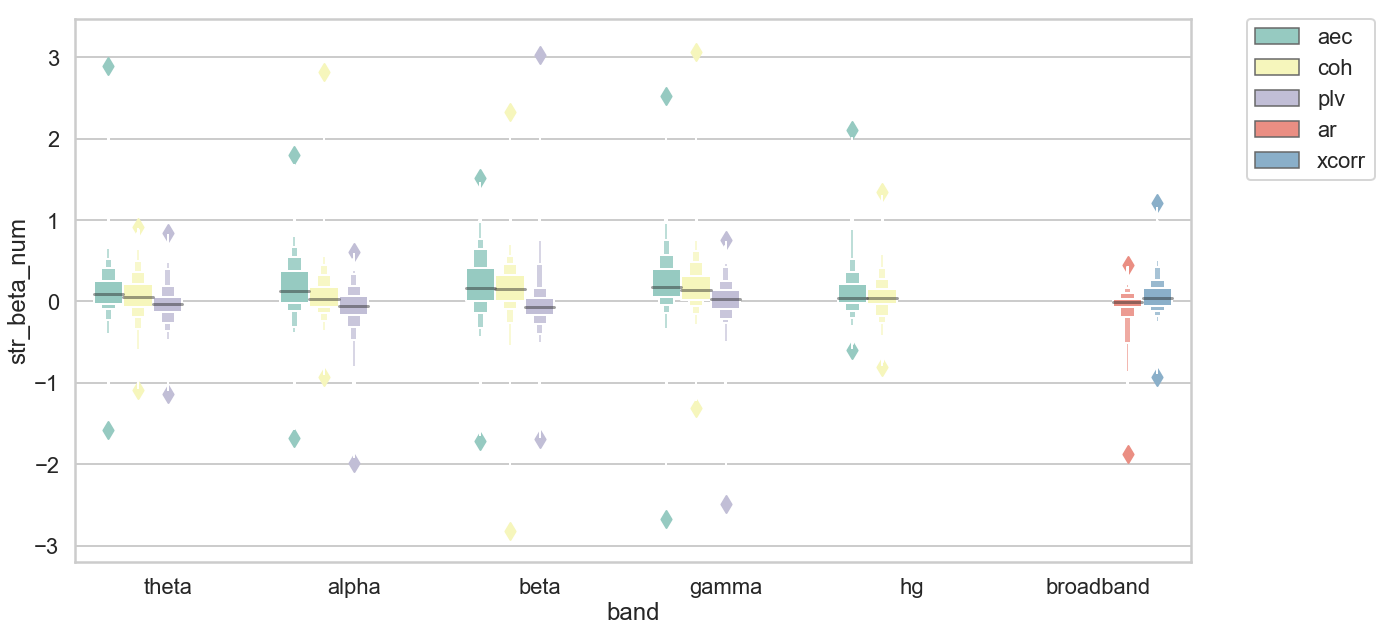

In [219]:
# color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_num', hue='fc_measure',
           order=['theta','alpha','beta','gamma','hg','broadband'], palette="Set3")
#sns.stripplot( data=net_data, x="band", y='str_beta_num',hue='fc_measure',color='black',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-4,4)
#plt.savefig("../img/net_num_str.eps")

Is it different within or outside of the SOZ?

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


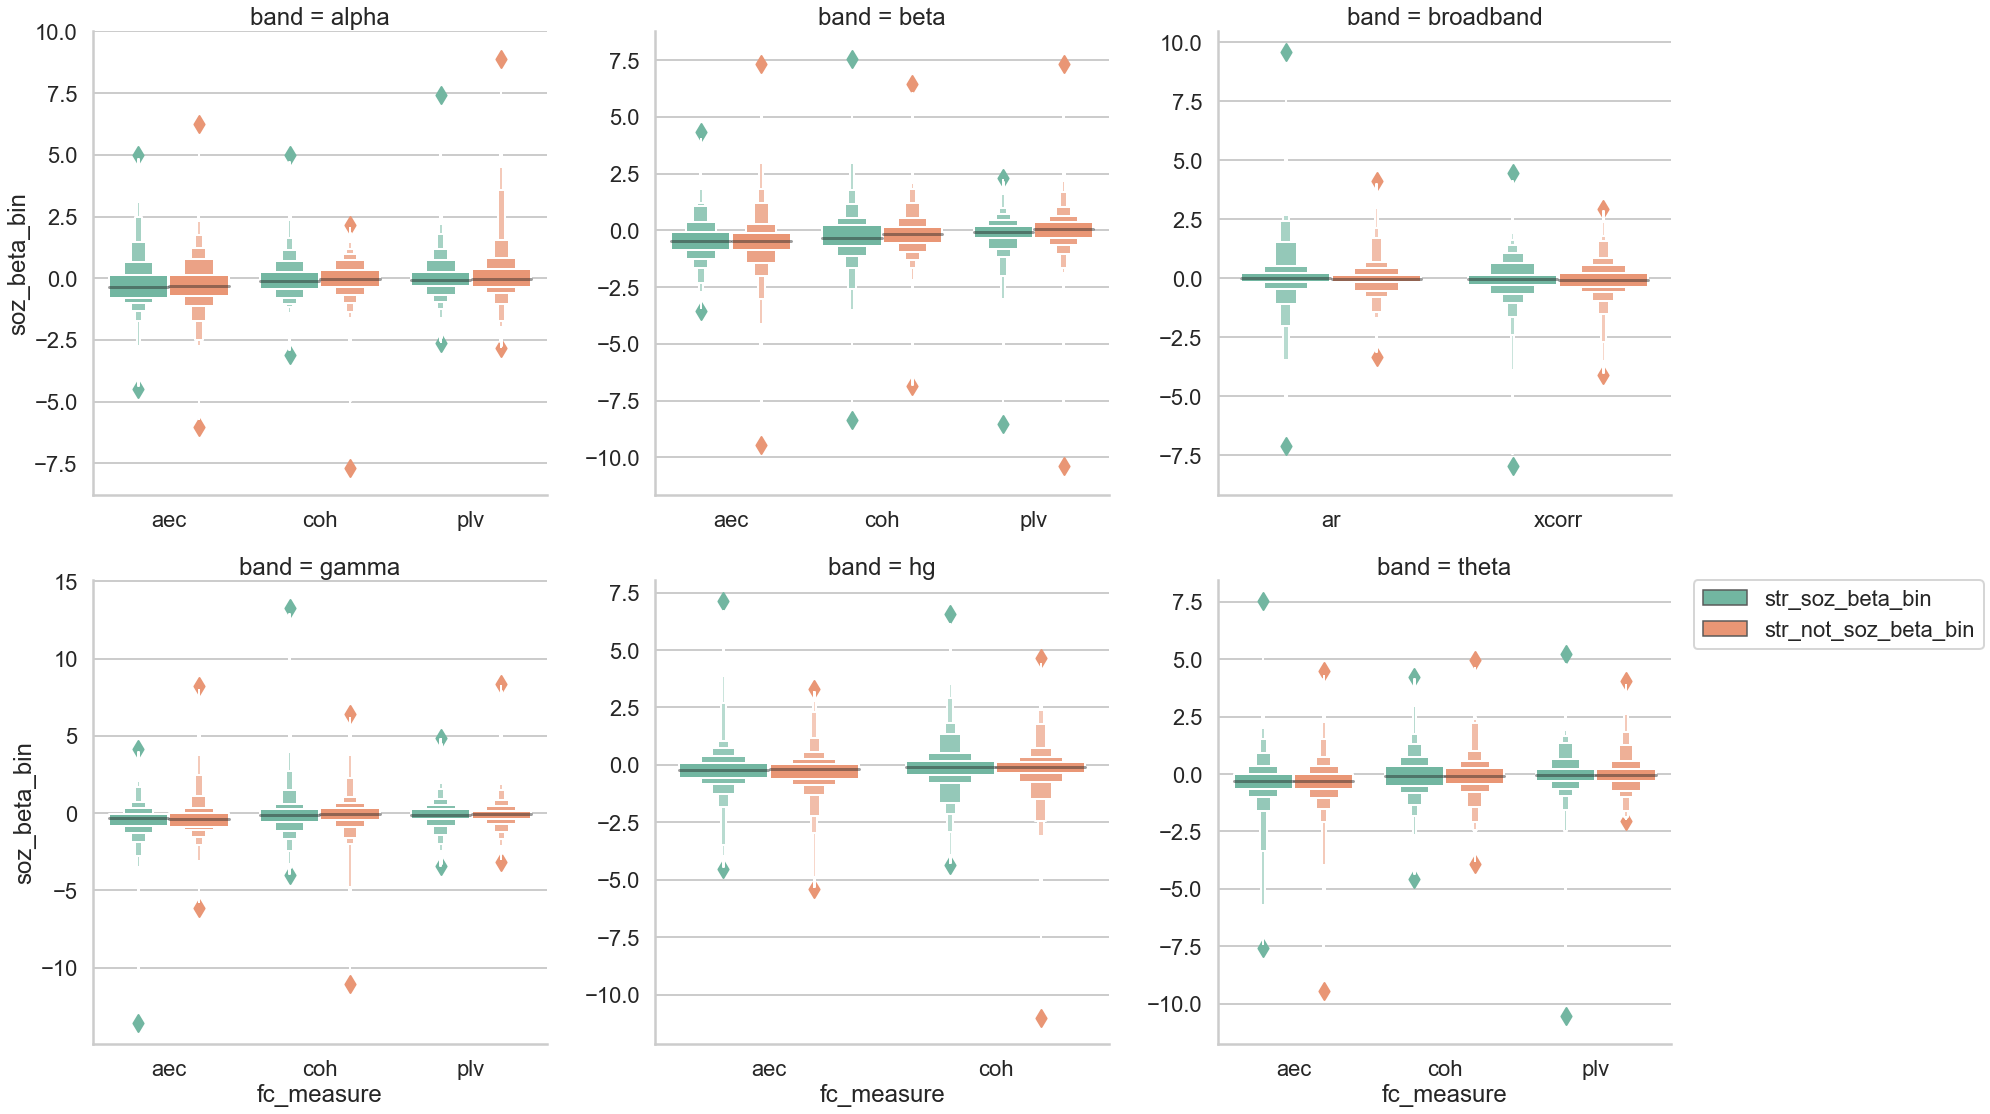

In [220]:
# reshape data
soz_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                           value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                           var_name ='SOZ', value_name ='soz_beta_bin')  

#color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette("Set1")
    
g = sns.FacetGrid(data=soz_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_bin', 'SOZ', palette = "Set2", hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_bin', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_soz_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


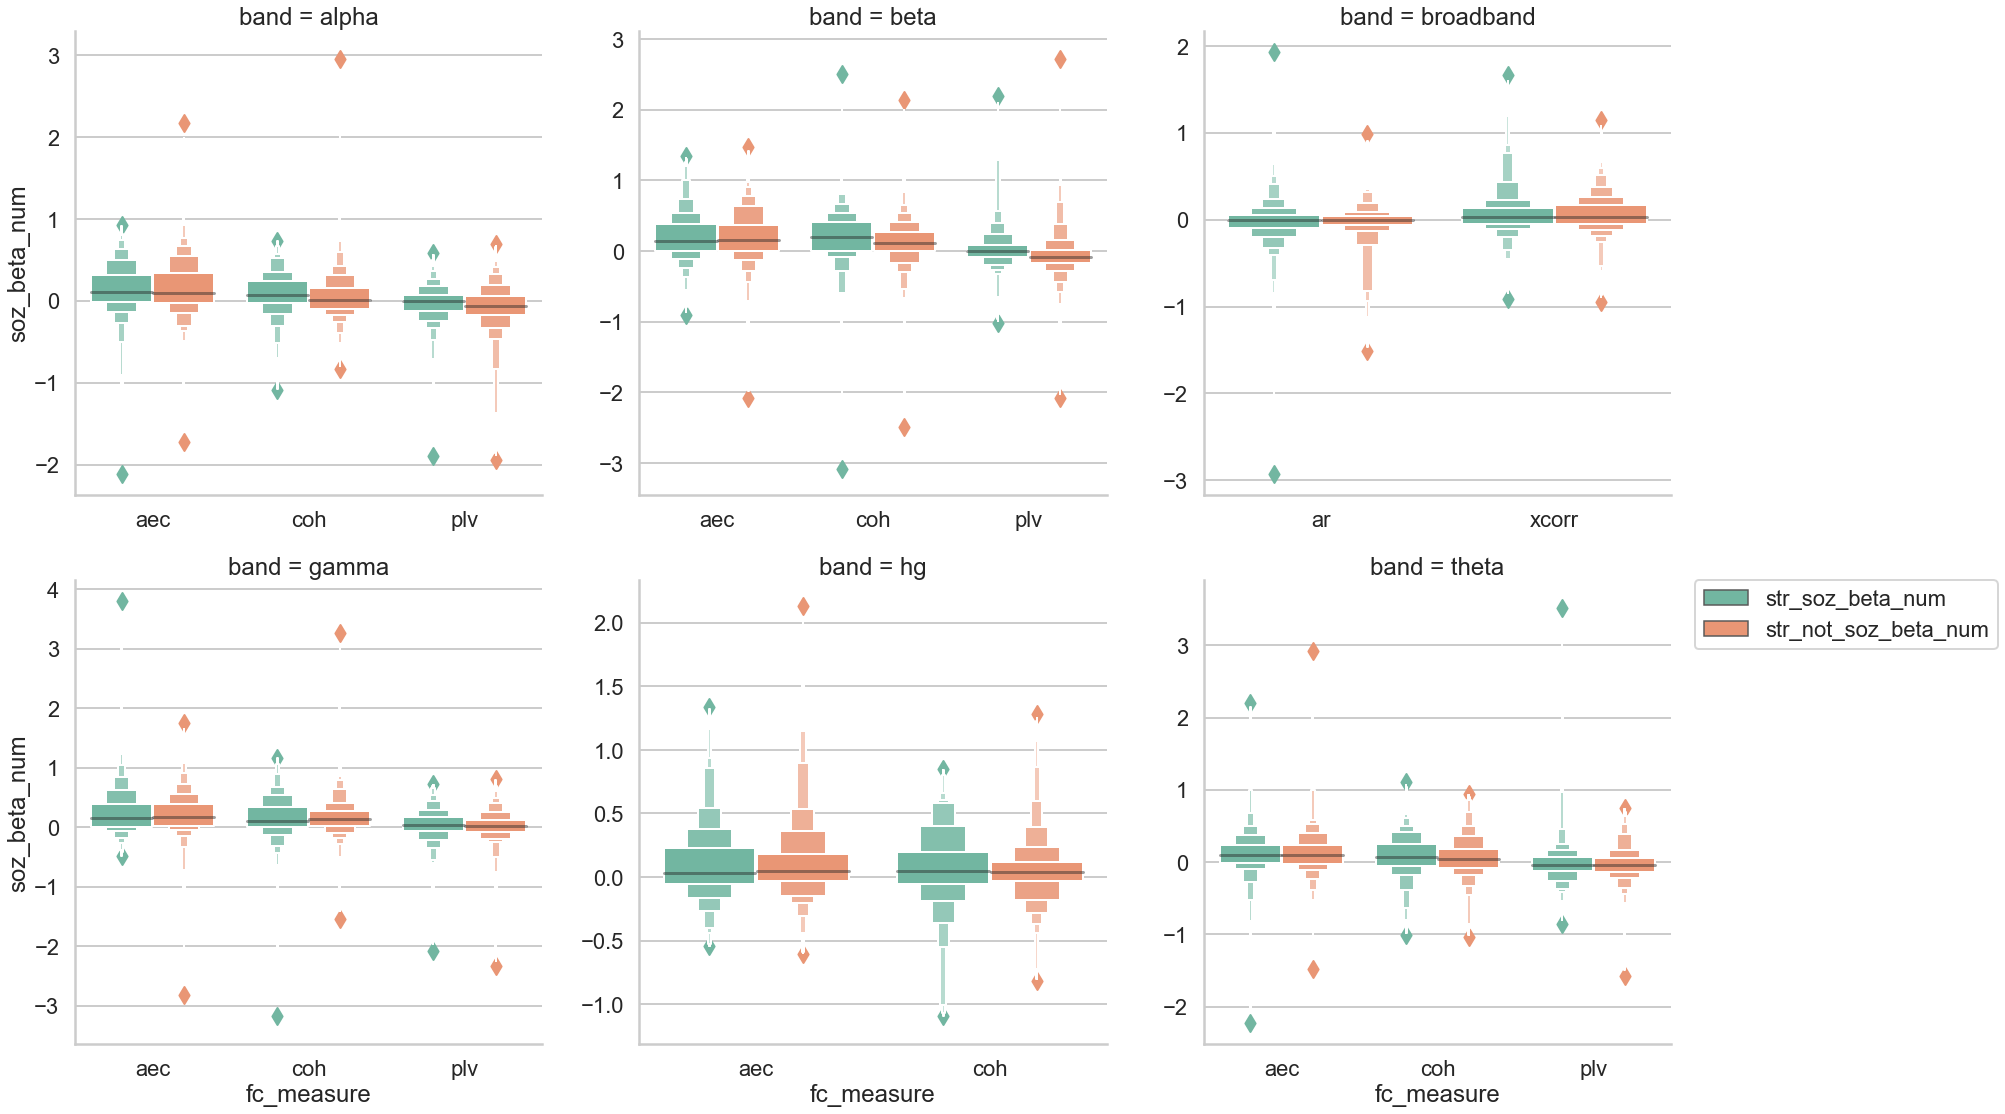

In [221]:
# reshape data
soz_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  var_name ='SOZ', value_name ='soz_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=soz_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_num', 'SOZ', palette = "Set2", hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_num', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

In [222]:
# save
# reformat before merge
soz_net_data_bin['SOZ'].replace('str_soz_beta_bin','within', inplace=True)
soz_net_data_bin['SOZ'].replace('str_not_soz_beta_bin','outside', inplace=True)
soz_net_data_num['SOZ'].replace('str_soz_beta_num','within', inplace=True)
soz_net_data_num['SOZ'].replace('str_not_soz_beta_num','outside', inplace=True)
soz_net_data = pd.merge(soz_net_data_bin, soz_net_data_num, on=['band', 'fc_measure', 'subj', 'SOZ', 'hand','race','gender','age'])
soz_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_soz_data_clean.csv')

Repeat for spikes

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


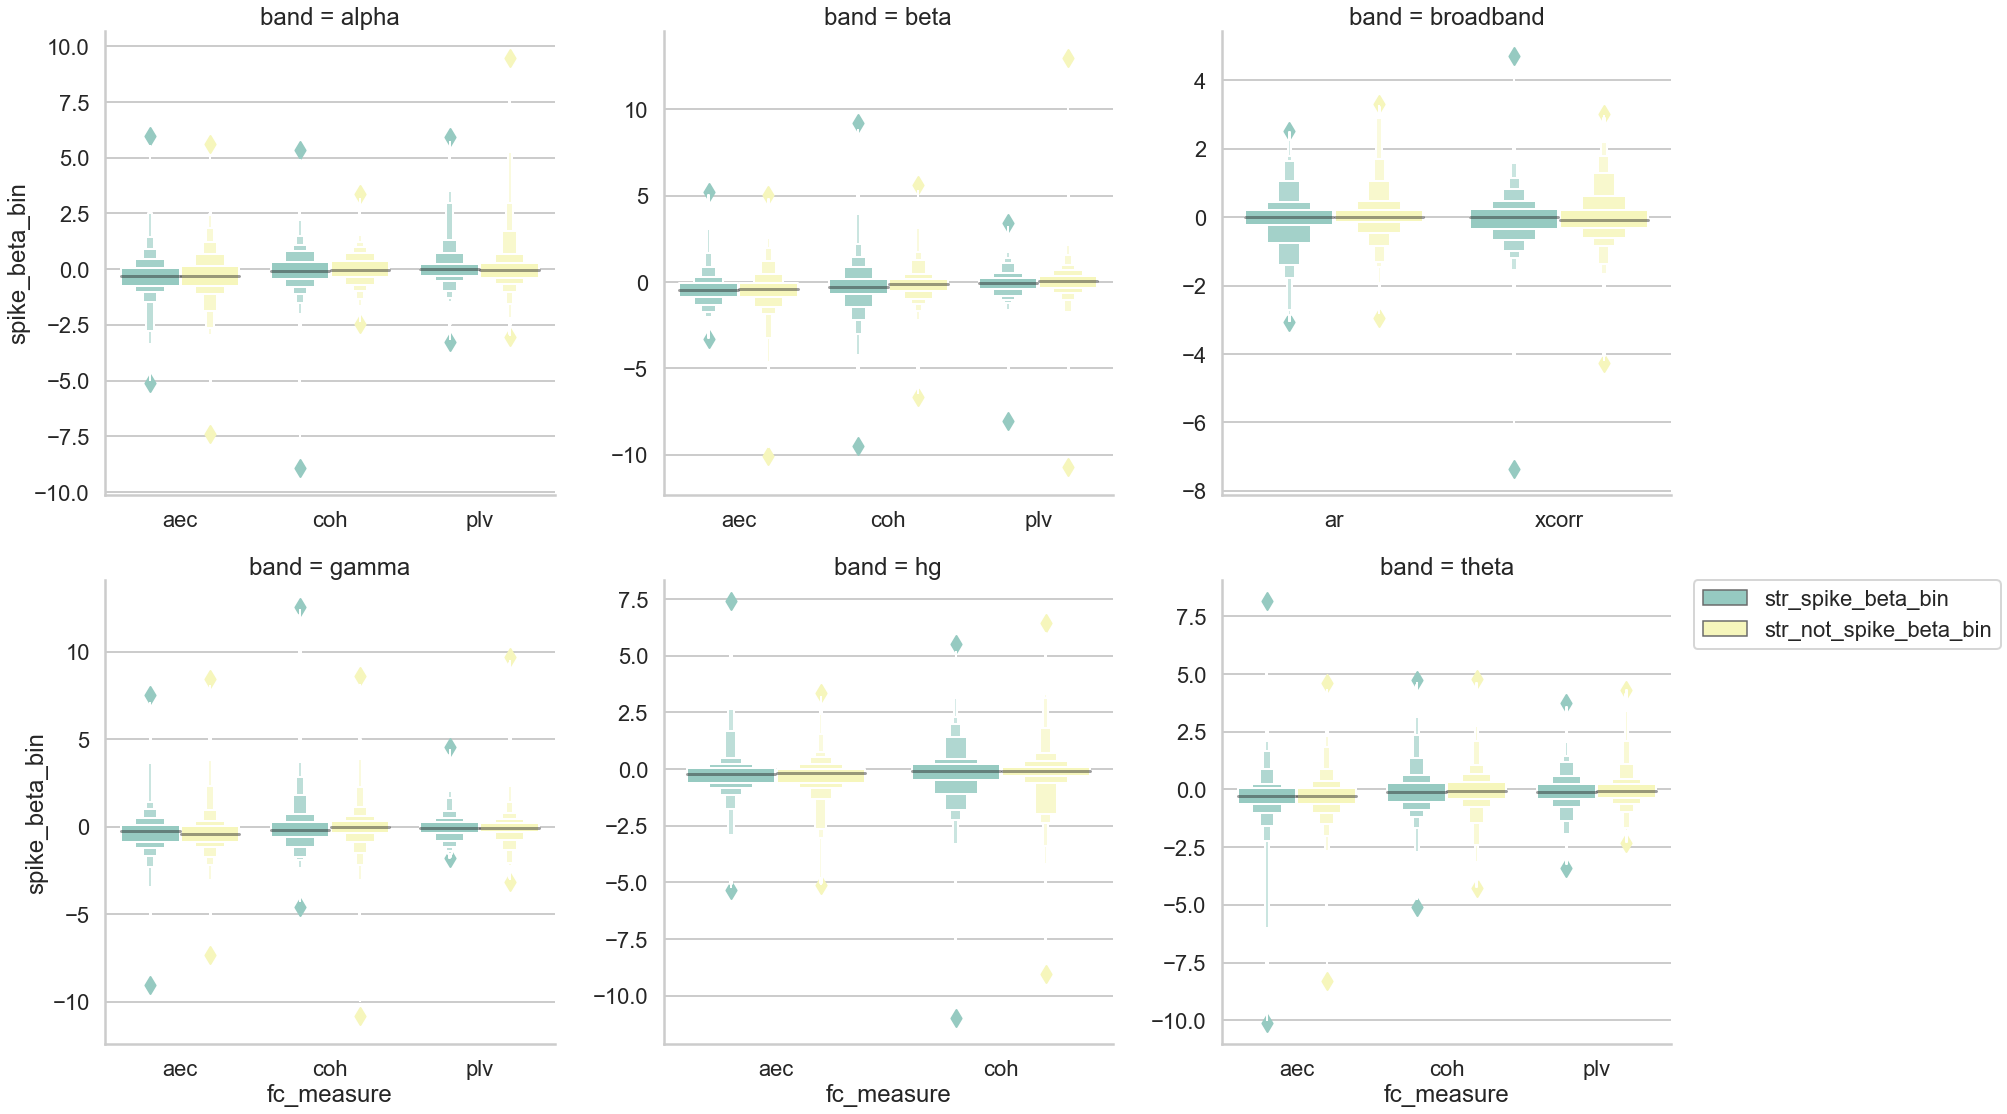

In [223]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_bin','str_not_spike_beta_bin'],  
                             var_name ='spike', value_name ='spike_beta_bin')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
g = sns.FacetGrid(data=spike_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_bin', 'spike', palette = "Set3", hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_bin', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
#    plt.setp(ax.lines, color=".9")
    
g.savefig("../img/net_spike_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


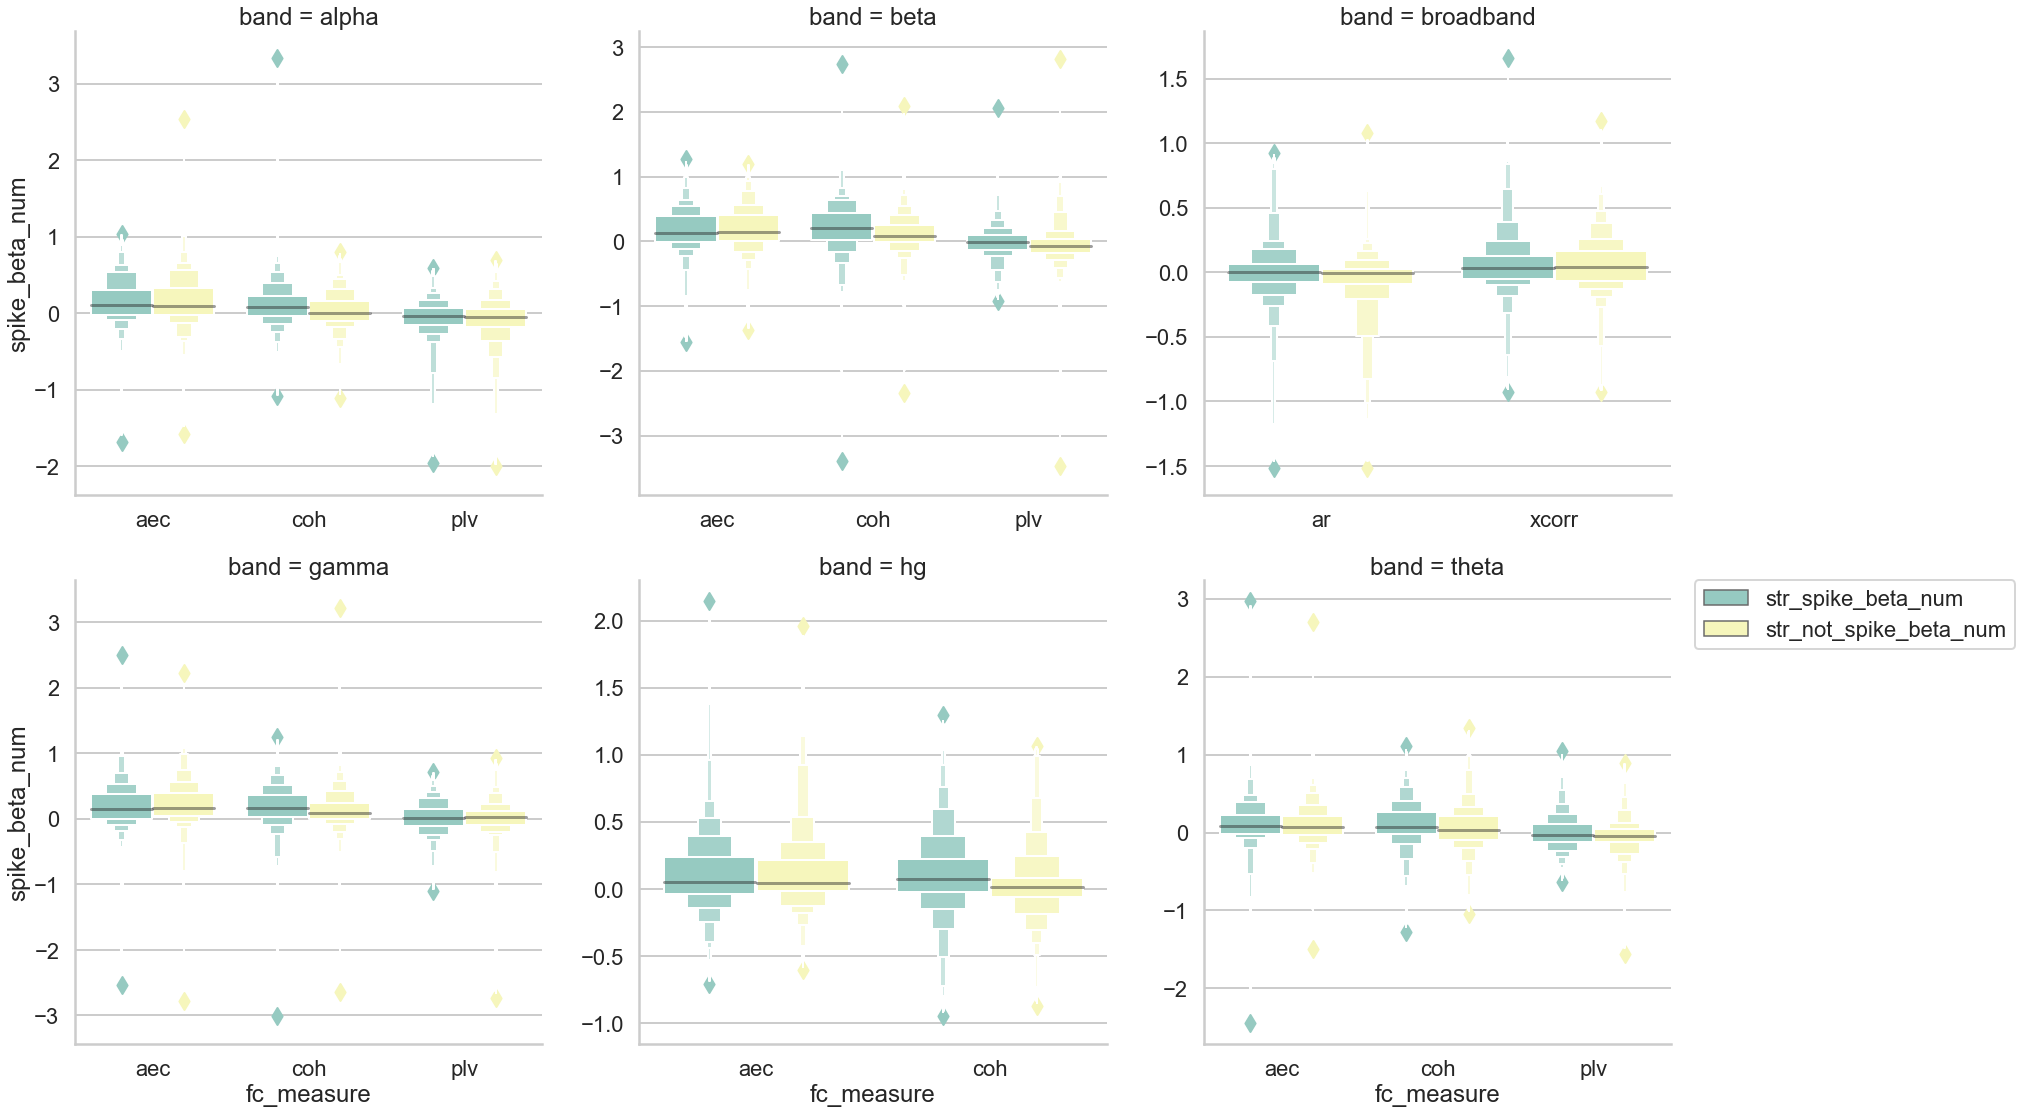

In [224]:
# reshape data
spike_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_num','str_not_spike_beta_num'],  
                             var_name ='spike', value_name ='spike_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=spike_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_num', 'spike', palette = "Set3", hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_spike_num.eps")

In [225]:
# save
# reformat before merge
spike_net_data_bin['spike'].replace('str_spike_beta_bin','within', inplace=True)
spike_net_data_bin['spike'].replace('str_not_spike_beta_bin','outside', inplace=True)
spike_net_data_num['spike'].replace('str_spike_beta_num','within', inplace=True)
spike_net_data_num['spike'].replace('str_not_spike_beta_num','outside', inplace=True)
spike_net_data = pd.merge(spike_net_data_bin, spike_net_data_num, on=['band', 'fc_measure', 'subj', 'spike', 'hand','race','gender','age'])
spike_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_spike_data_clean.csv')

## Effects on Node Measures

relationship between the number of spikes seen in that node, and the beta value

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


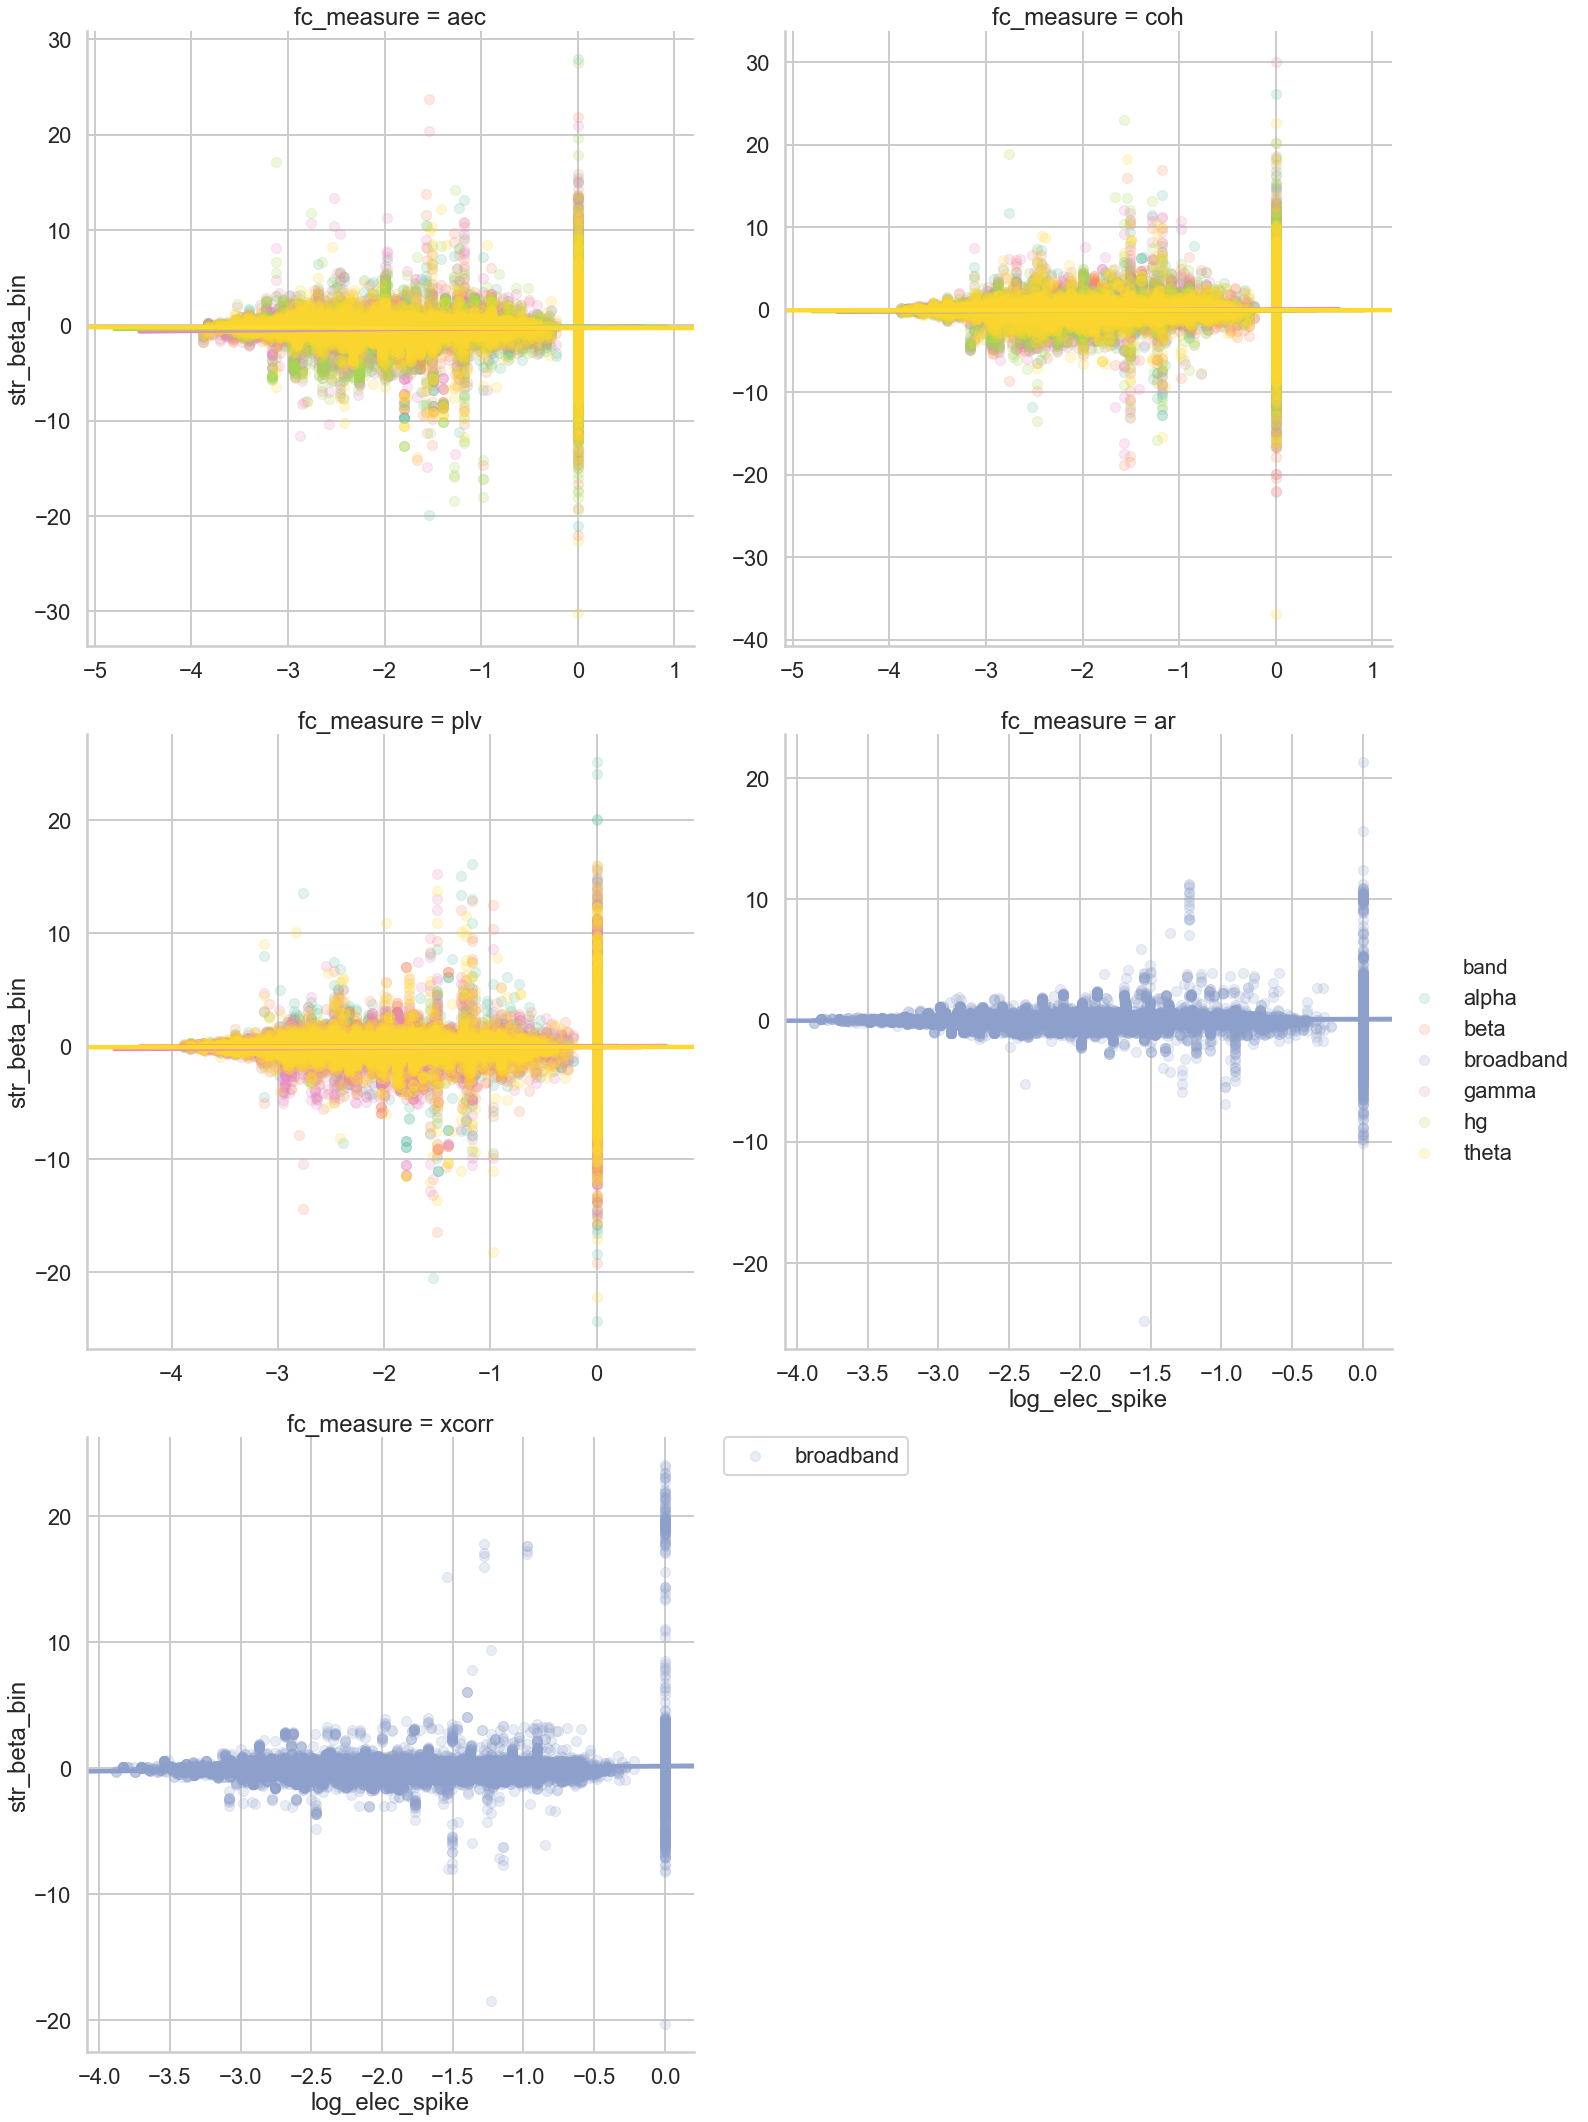

In [226]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

In [ ]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, robust=True, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Total strength

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


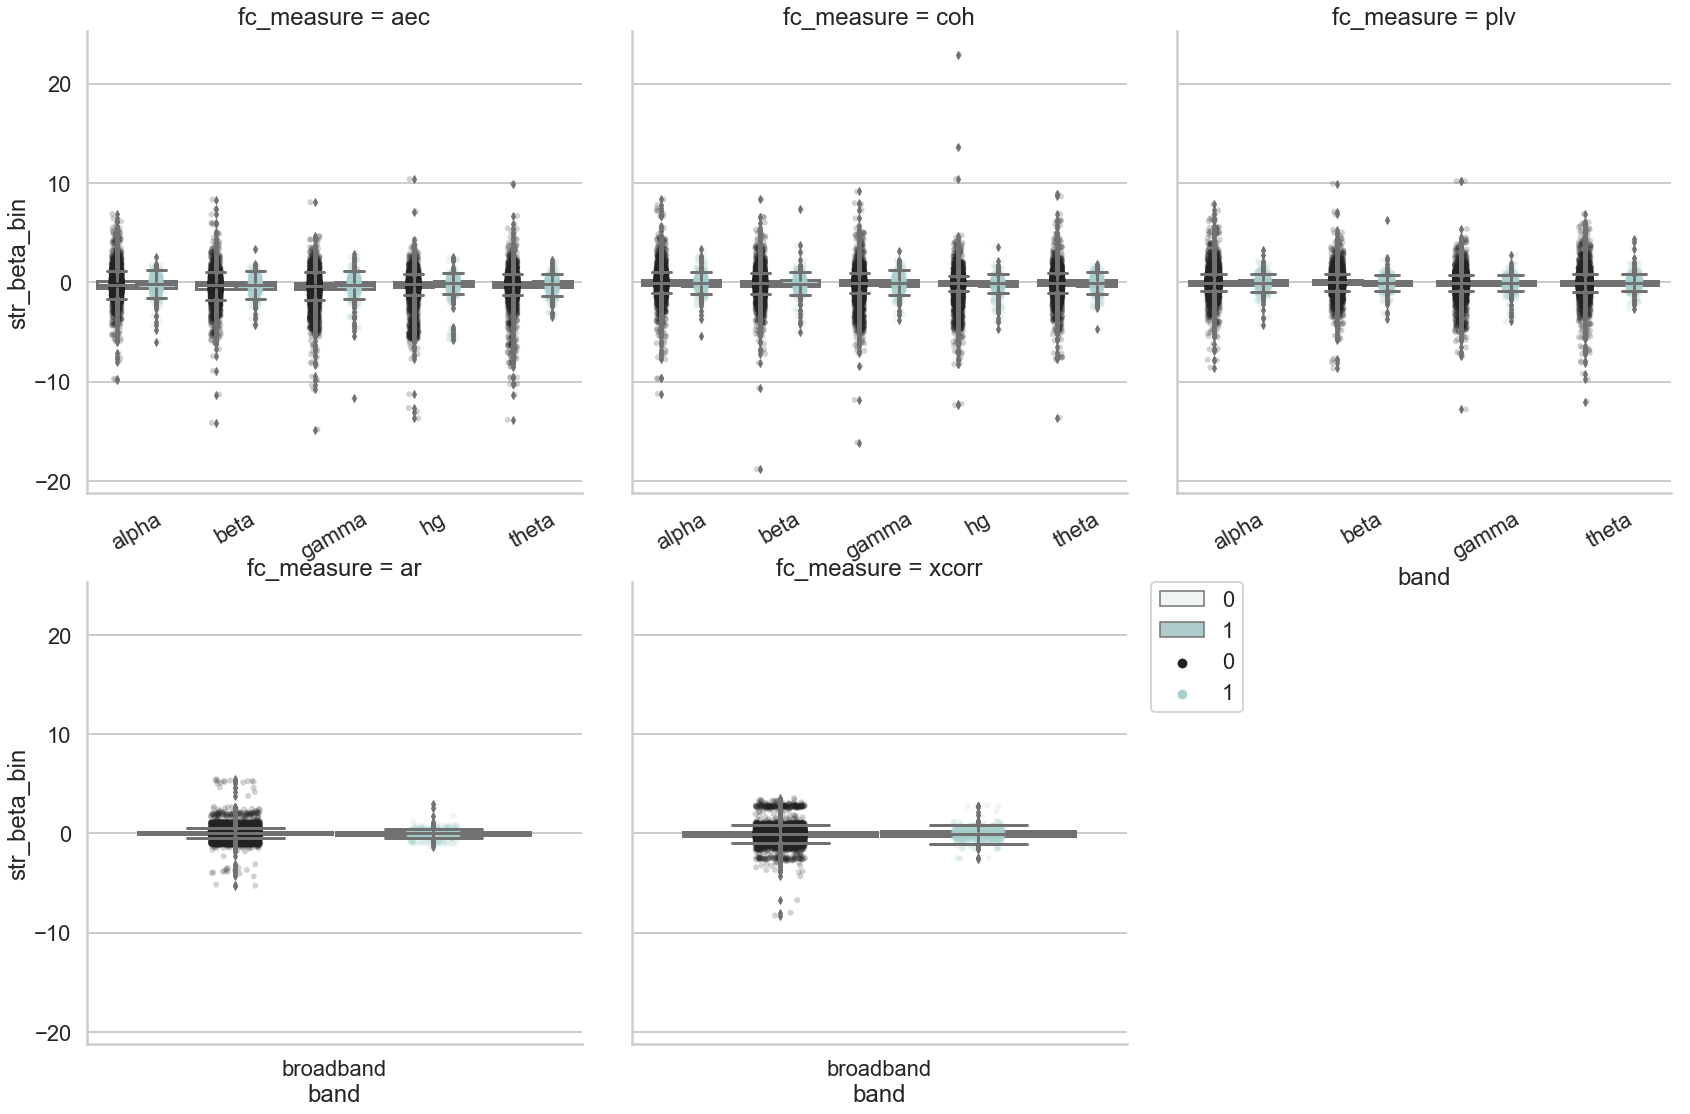

In [25]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


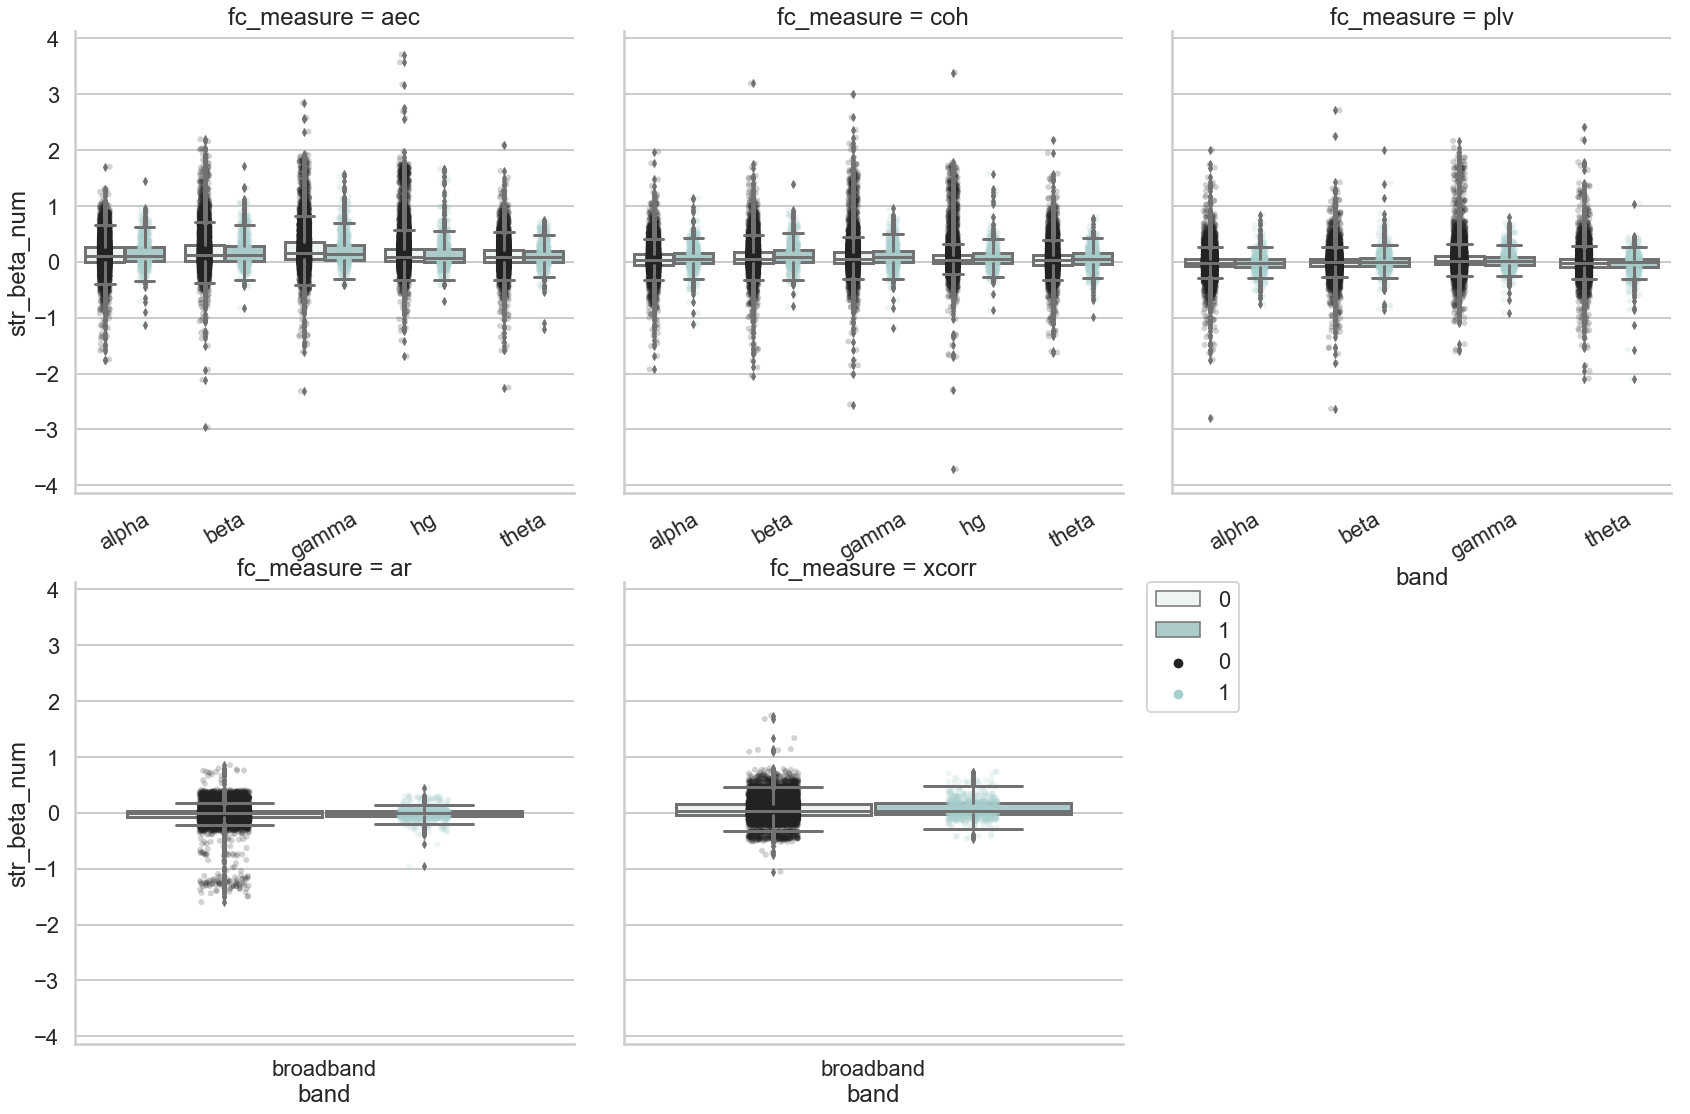

In [26]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

### Categorize SOZ

In [ ]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [ ]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

In [ ]:
sns.countplot(data=epilepsy_type, x='locus')

In [ ]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.head()

In [ ]:
node_data.info()

## Net plots with category by locus

In [ ]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
#g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    
#g.savefig("../img/net_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


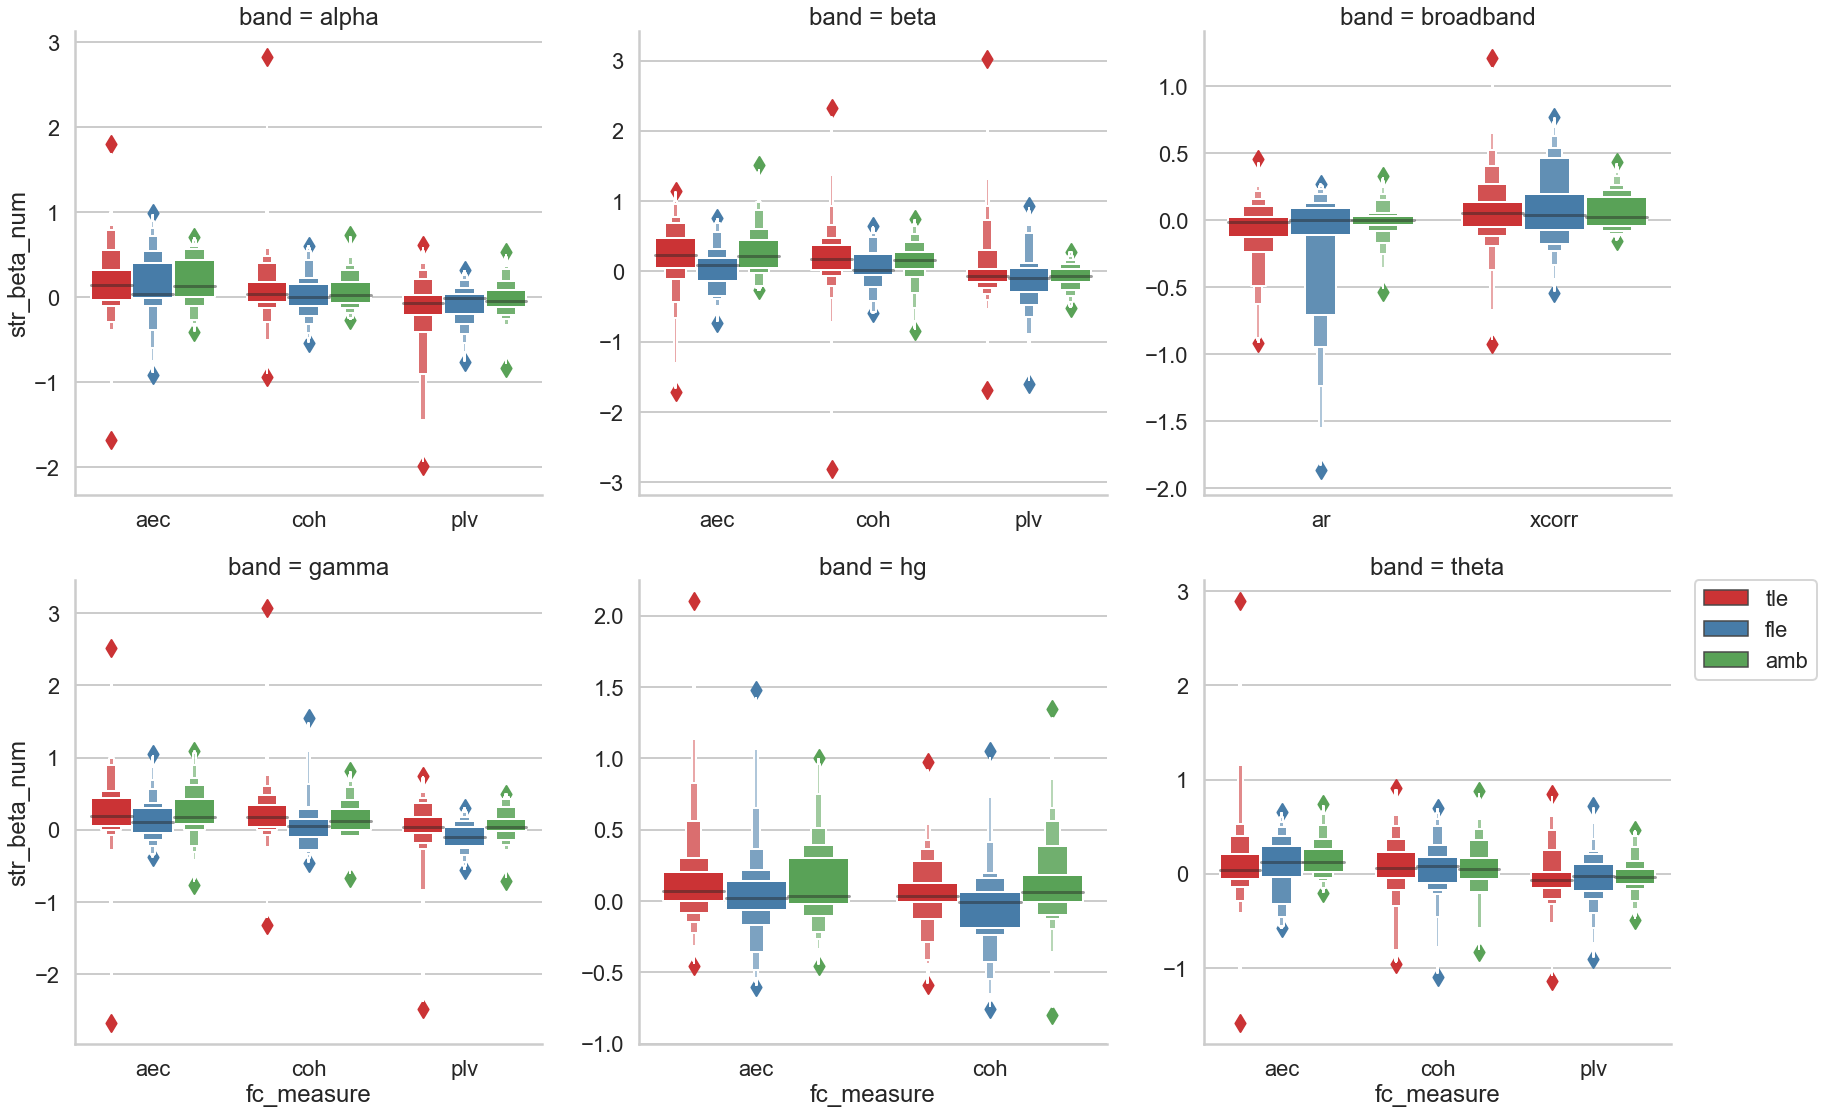

In [141]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

## Behavior

In [142]:
task_data = pd.read_csv(f'{RAM_dir}group_analysis/task_performance.csv', index_col=0)
task_data.reset_index(inplace=True)
task_data.head(10)

subj        YC  TH       PAL  catFR        FR
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573
1  R1002P       NaN NaN  0.492335    NaN  0.945857
2  R1003P       NaN NaN  0.083711    NaN  0.602817
3  R1004D       NaN NaN       NaN  0.625       NaN
4  R1006P  0.401778 NaN       NaN    NaN  0.779412
5  R1008J  0.530724 NaN       NaN    NaN       NaN
6  R1009W  0.183700 NaN       NaN    NaN       NaN
7  R1010J  0.358207 NaN       NaN    NaN  0.825373
8  R1013E  0.182021 NaN       NaN    NaN       NaN
9  R1014D  0.354468 NaN       NaN    NaN       NaN

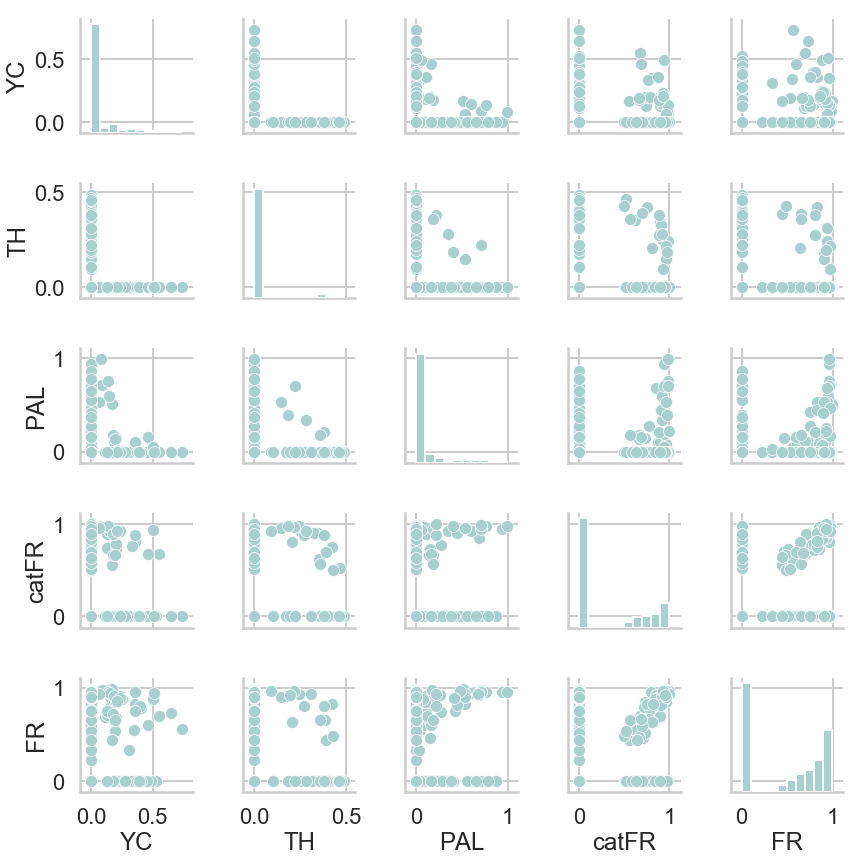

In [143]:
sns.pairplot(data=task_data.fillna(0), vars=['YC','TH','PAL','catFR','FR'])

In [144]:
# add averages over recal and nav tasks
task_data = task_data.assign(recall = task_data[['catFR','FR','PAL']].mean(axis=1, skipna=True))
task_data = task_data.assign(nav = task_data[['TH','YC']].mean(axis=1, skipna=True))
task_data = task_data.assign(avg = task_data[['nav','recall']].mean(axis=1, skipna=True))
task_data.head()

subj        YC  TH       PAL  catFR        FR    recall       nav  \
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573  0.293972  0.345526   
1  R1002P       NaN NaN  0.492335    NaN  0.945857  0.719096       NaN   
2  R1003P       NaN NaN  0.083711    NaN  0.602817  0.343264       NaN   
3  R1004D       NaN NaN       NaN  0.625       NaN  0.625000       NaN   
4  R1006P  0.401778 NaN       NaN    NaN  0.779412  0.779412  0.401778   

        avg  
0  0.319749  
1  0.719096  
2  0.343264  
3  0.625000  
4  0.590595

In [145]:
# merge with net_data
subj_idx = [x in net_data.subj.unique() for x in task_data.subj]
task_data = task_data[subj_idx]
net_task_data = pd.merge(net_data, task_data, on=['subj'])
net_task_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 0 to 2363
Data columns (total 28 columns):
band_measure              2364 non-null object
n_tp                      2364 non-null int64
str_beta_bin              2364 non-null float64
str_beta_num              2364 non-null float64
str_soz_beta_bin          2364 non-null float64
str_soz_beta_num          2364 non-null float64
str_not_soz_beta_num      2364 non-null float64
str_spike_beta_num        2364 non-null float64
str_not_soz_beta_bin      2364 non-null float64
str_spike_beta_bin        2364 non-null float64
str_not_spike_beta_bin    2364 non-null float64
fc_measure                2364 non-null object
str_not_spike_beta_num    2364 non-null float64
band                      2364 non-null object
subj                      2364 non-null object
hand                      2364 non-null object
age                       2364 non-null float64
gender                    2364 non-null object
race                      2364 non-nu

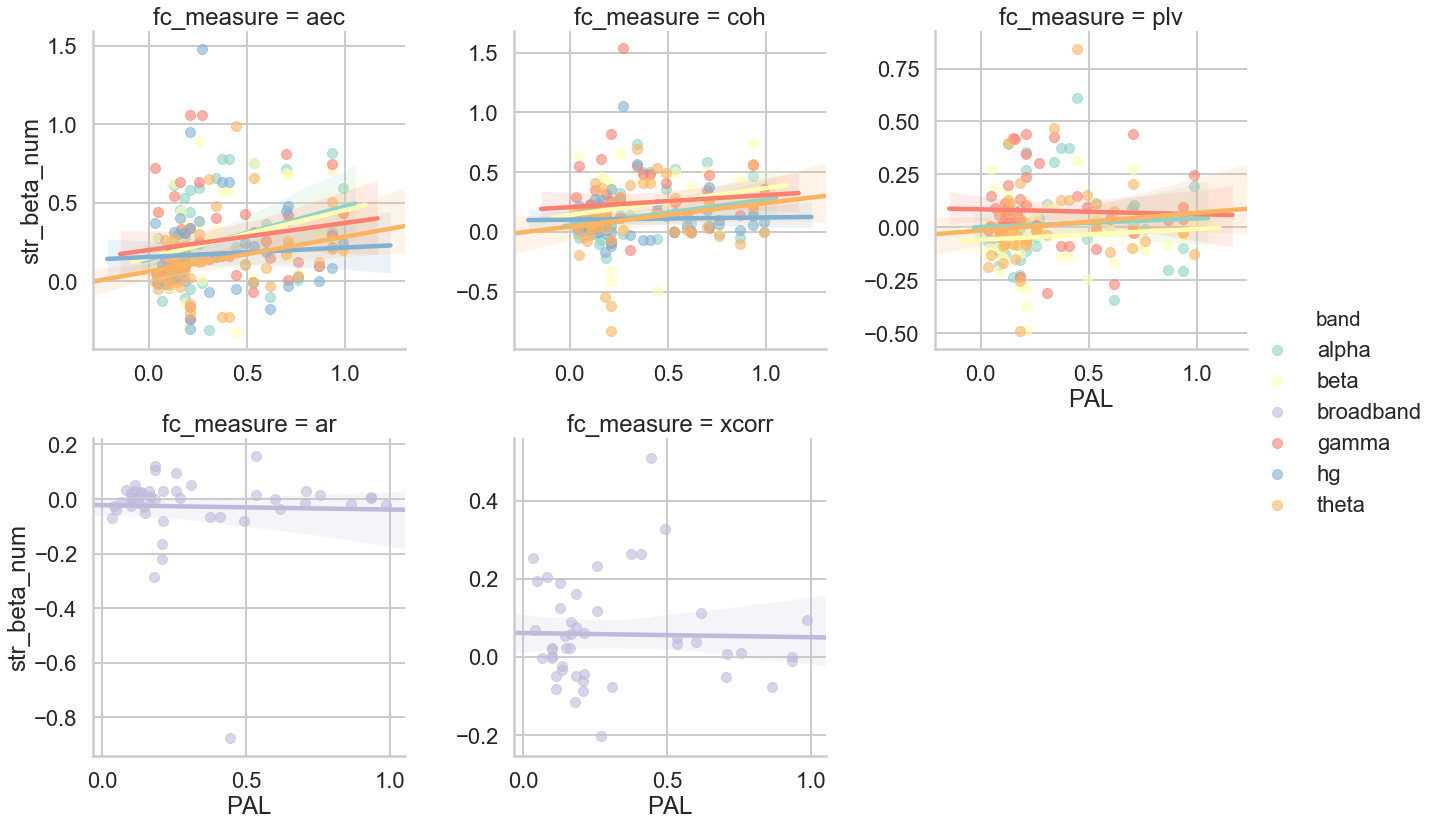

In [164]:
sns.lmplot(data=net_task_data, x='PAL', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

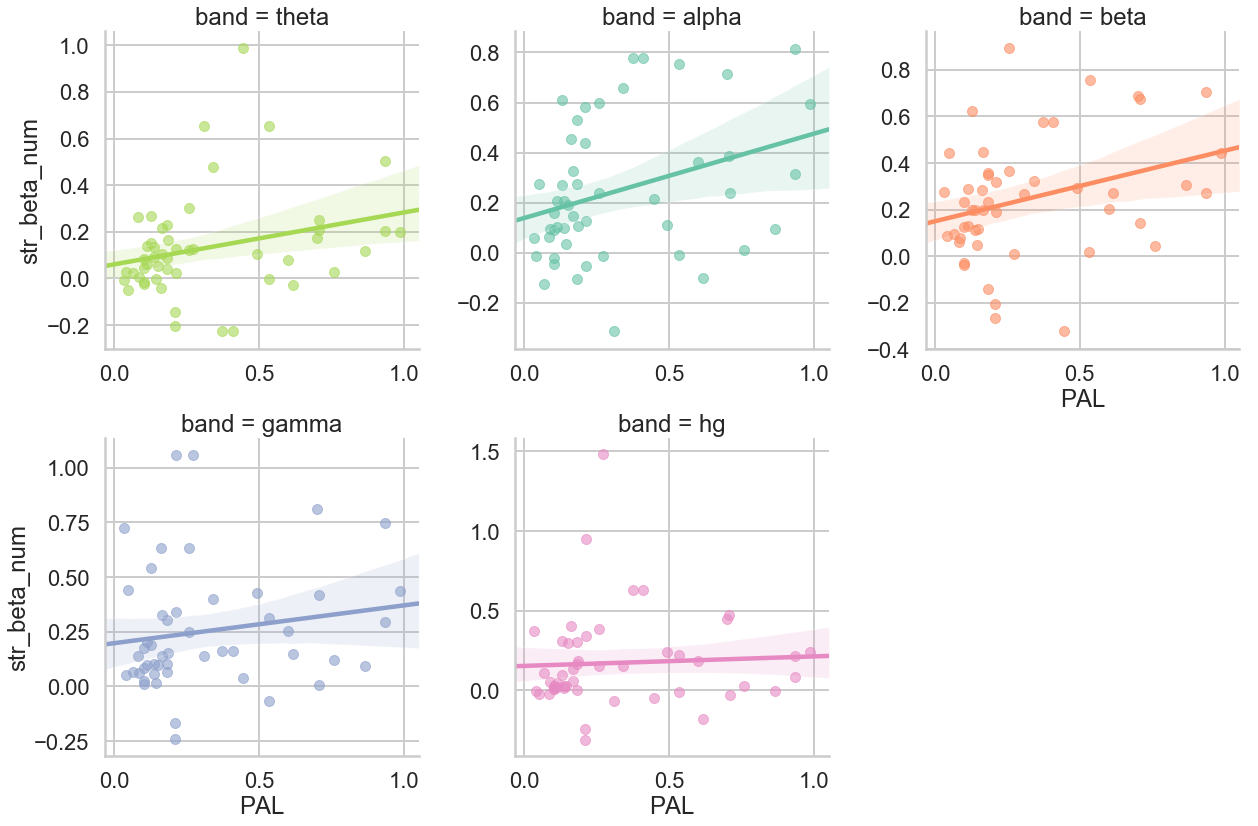

In [165]:
sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='PAL', y='str_beta_num', hue='band', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6}, col_order=['theta','alpha','beta','gamma','hg'])
plt.savefig("../img/task_perf_band.eps")

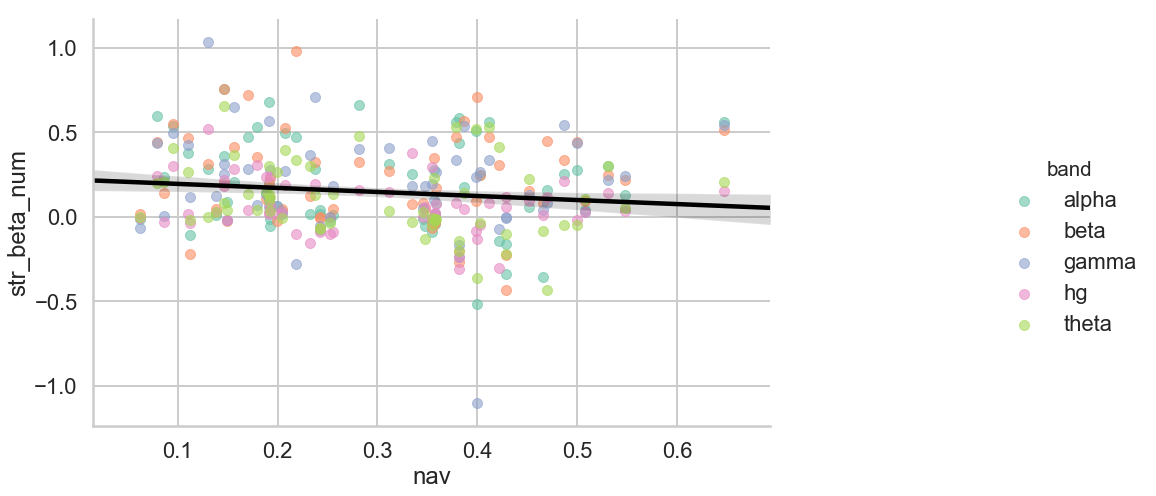

In [151]:
g = sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', fit_reg=False,
           height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})
sns.regplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', scatter=False, ax=g.axes[0,0], color='black')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.savefig("../img/task_perf_band.eps")

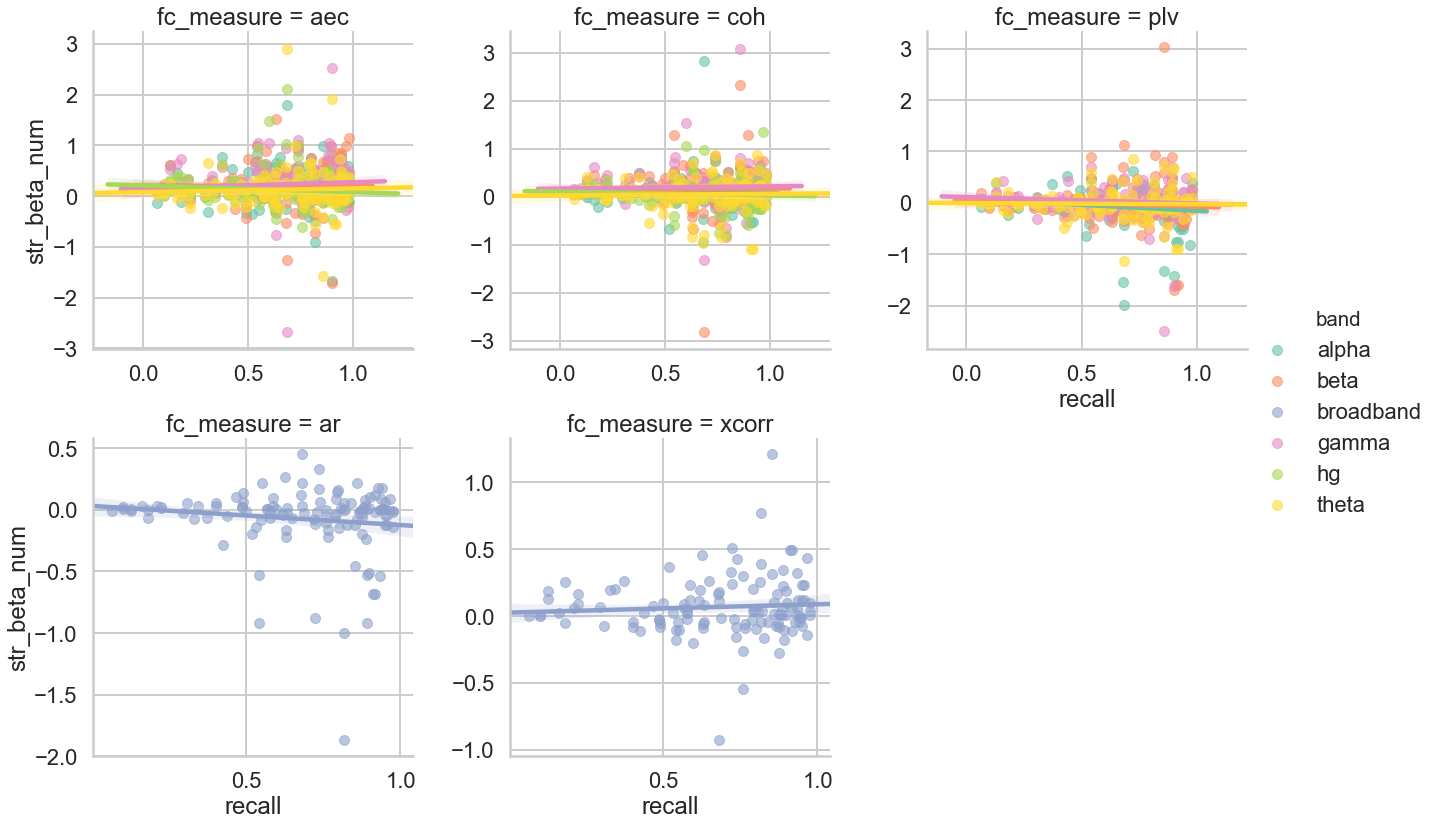

In [152]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

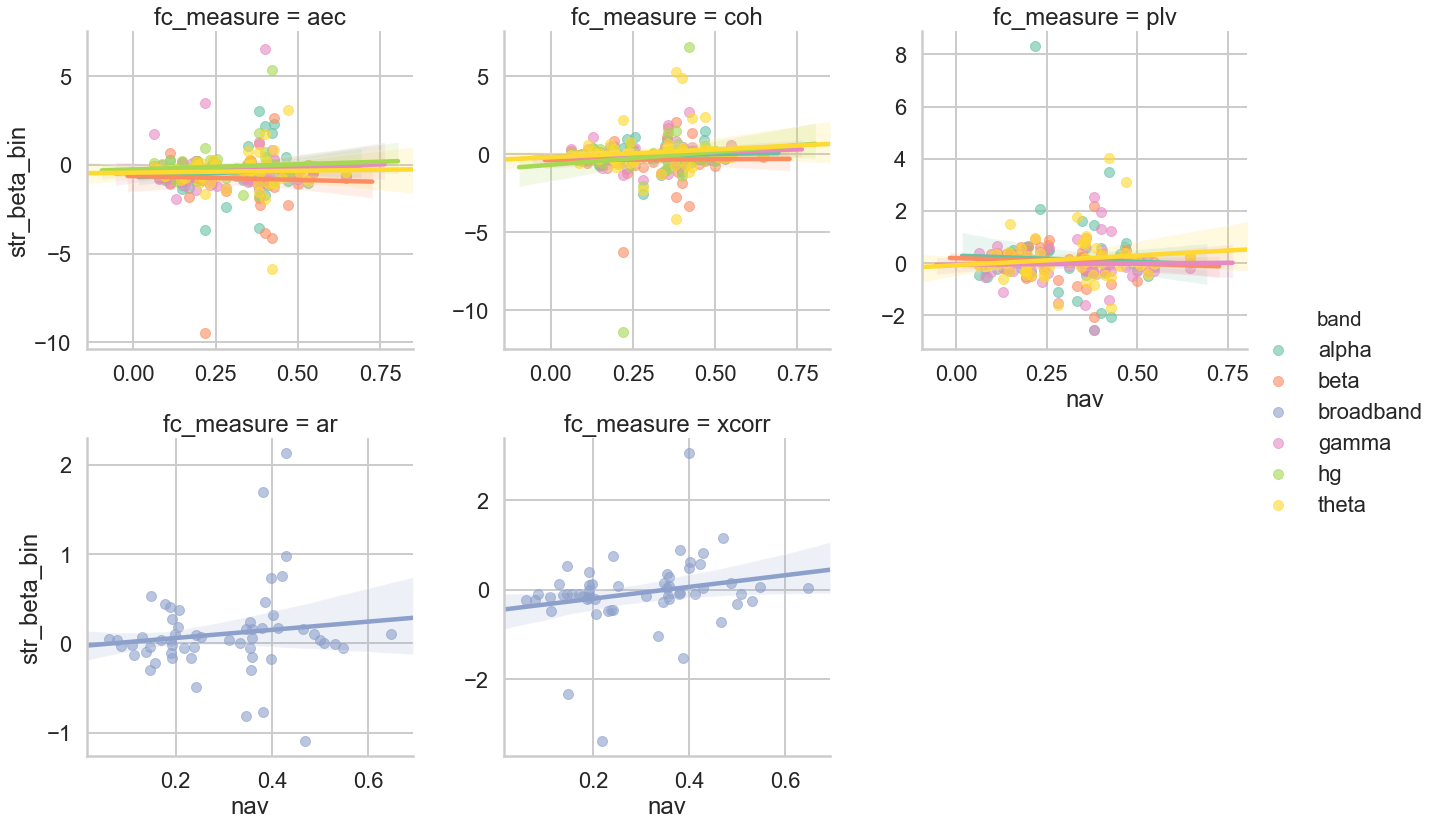

In [153]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

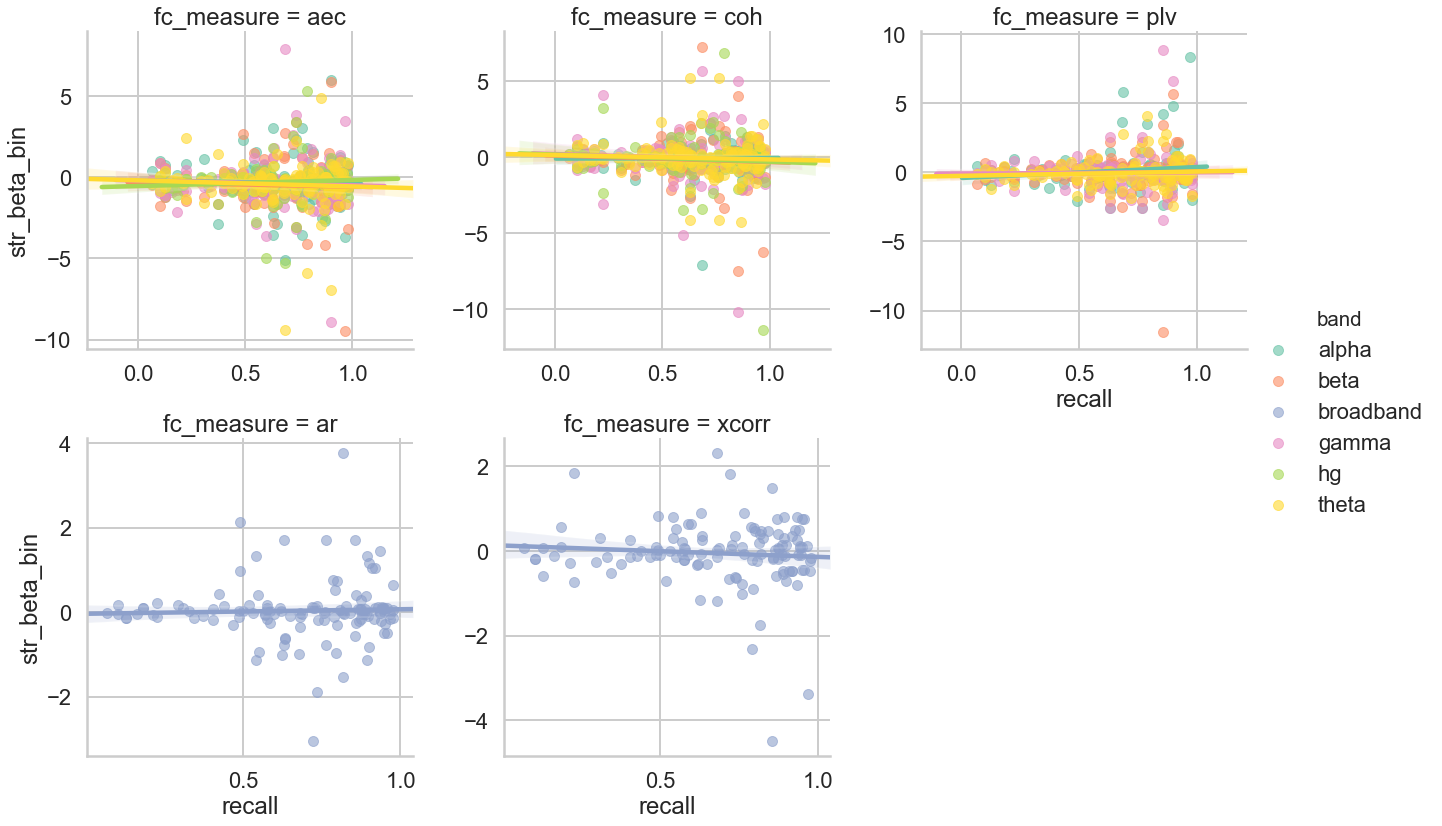

In [154]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

In [155]:
# save
net_task_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_task_data_clean.csv')

Other parameters

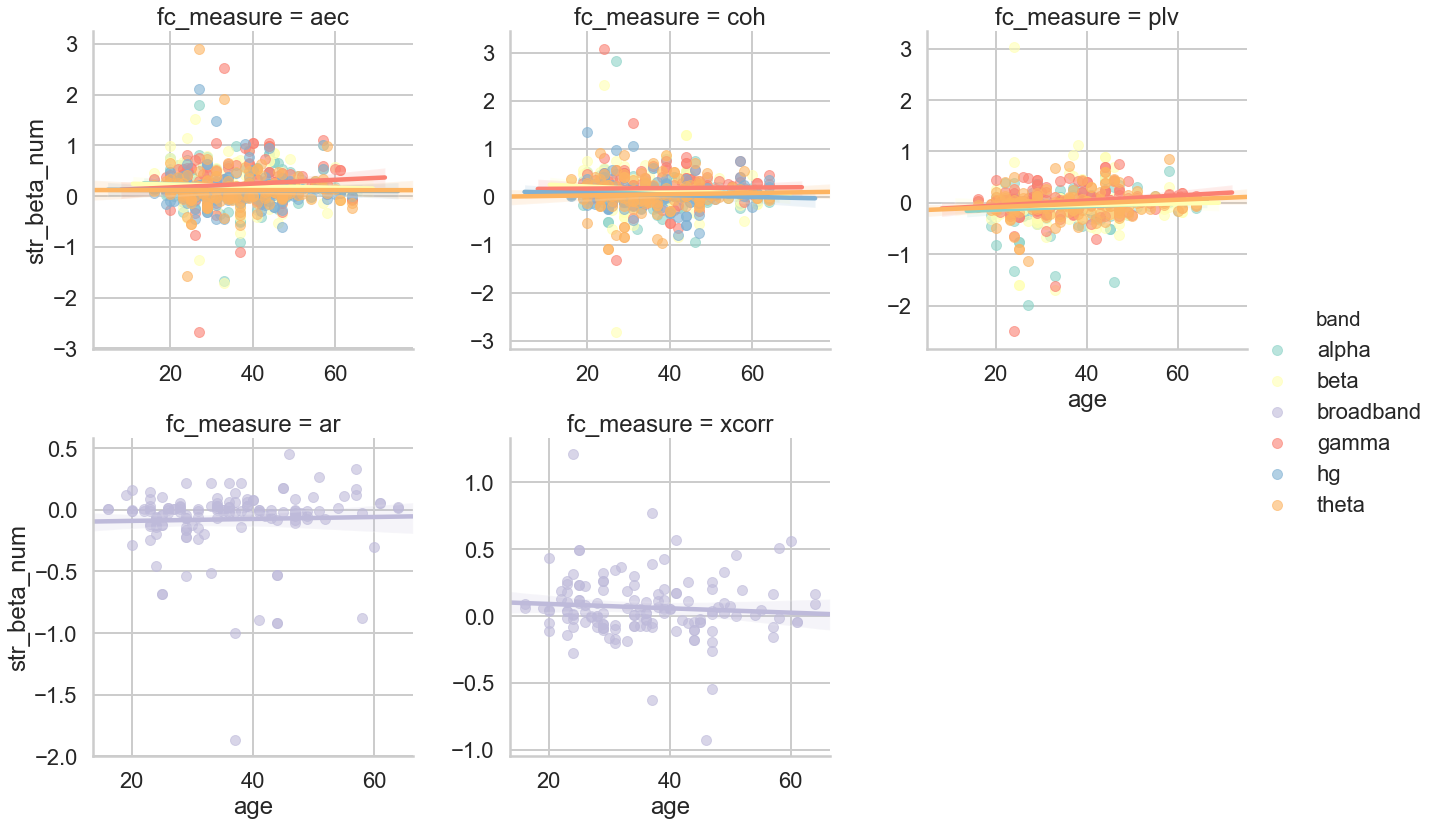

In [156]:
sns.lmplot(data=net_task_data, x='age', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


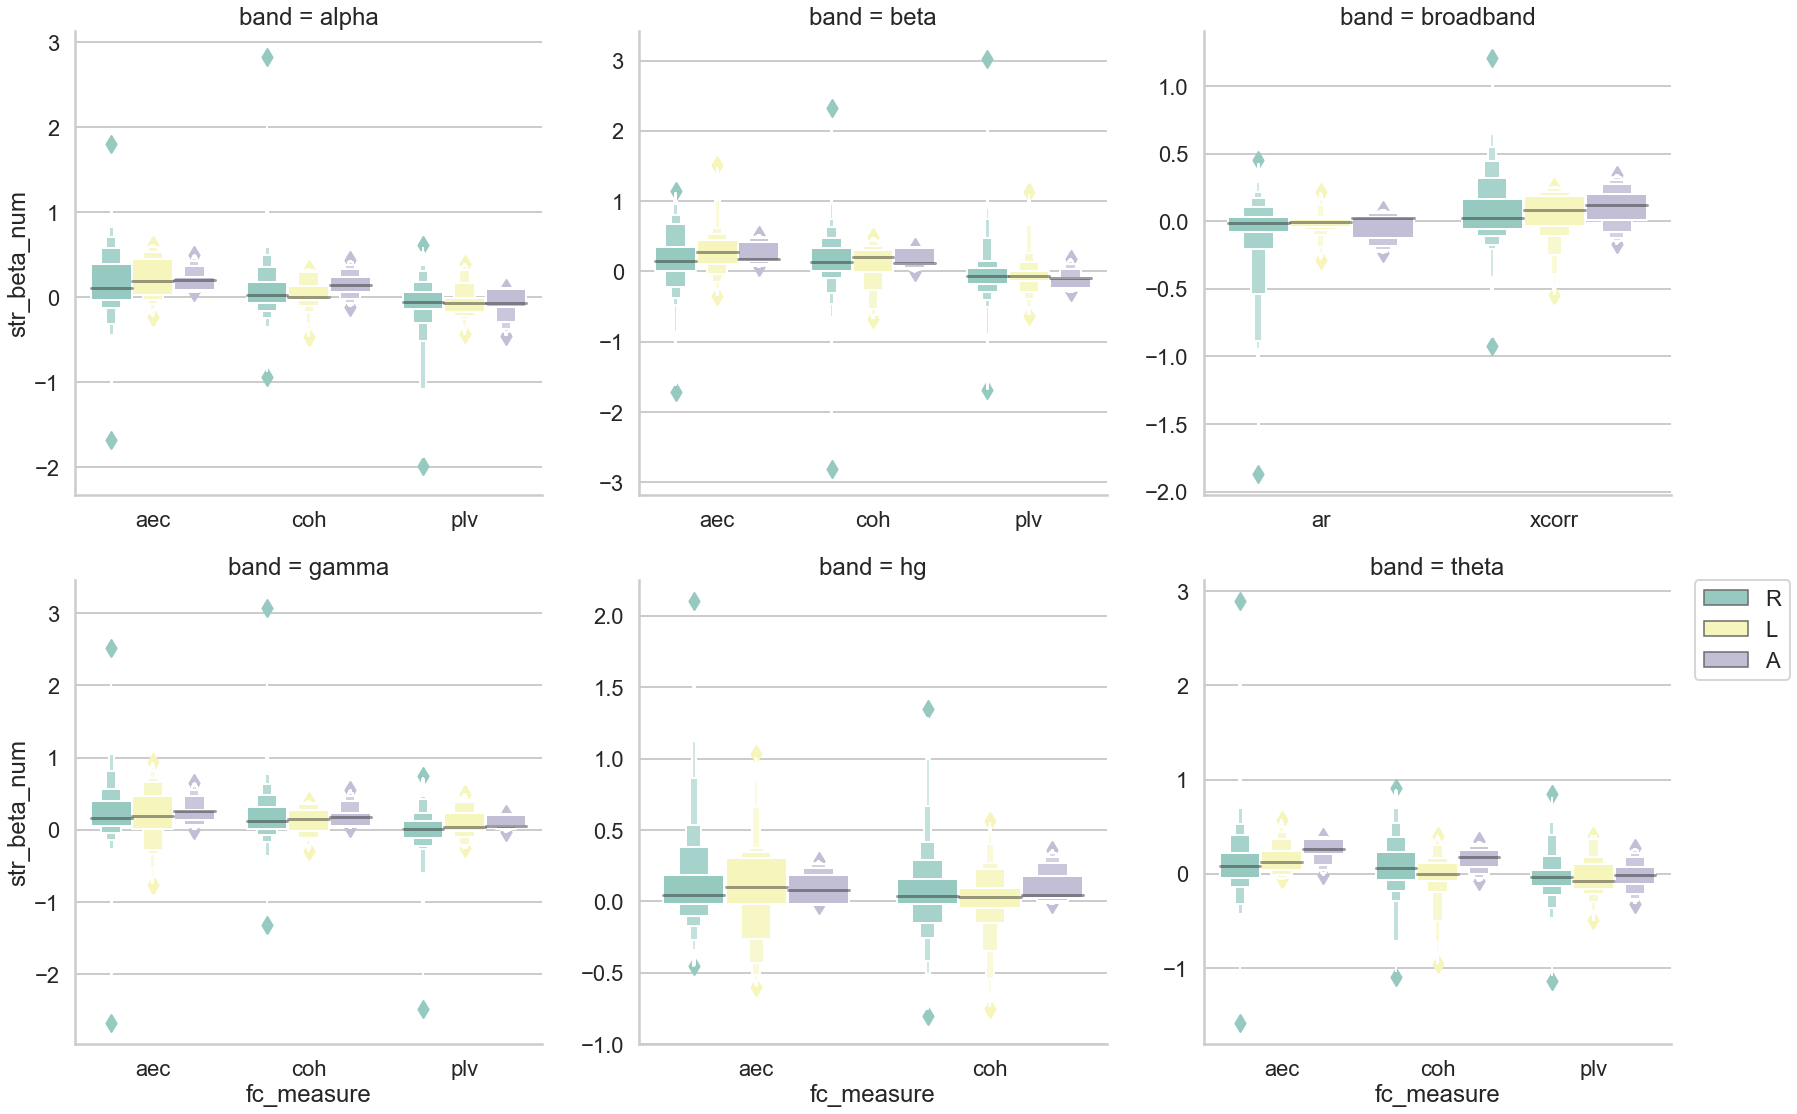

In [157]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'hand', palette = "Set3", hue_order=['R','L', 'A'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)